In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from dice_rl_TU_Vienna.plot.continuous import get_logs

from plugins.boyan_chain.continuous.config import *
from plugins.boyan_chain.continuous.plot import get_plot_logs

data/boyan_chain/datasets/seed=0_num_experience=100000_N=12_kind=episodic/dataset-ctr.pkl
data/boyan_chain/datasets/seed=0_num_experience=100000_N=12_kind=continuing/dataset-ctr.pkl
data/boyan_chain/datasets/seed=1_num_experience=100000_N=12_kind=episodic/dataset-ctr.pkl
data/boyan_chain/datasets/seed=1_num_experience=100000_N=12_kind=continuing/dataset-ctr.pkl
data/boyan_chain/datasets/seed=2_num_experience=100000_N=12_kind=episodic/dataset-ctr.pkl
data/boyan_chain/datasets/seed=2_num_experience=100000_N=12_kind=continuing/dataset-ctr.pkl
data/boyan_chain/datasets/seed=3_num_experience=100000_N=12_kind=episodic/dataset-ctr.pkl
data/boyan_chain/datasets/seed=3_num_experience=100000_N=12_kind=continuing/dataset-ctr.pkl


# Selected Plots

## Prepare

In [14]:
std_girth = 0.5
alpha = 0.1
markevery = 100

colors_e = ["green", "red", "cyan"]
markers_e = ["3", "4", "+"]

colors_c = colors_e[1:]
markers_c = markers_e[1:]

In [4]:
def plot_pv(logs, analytical, suptitle, title, labels, colors, markers, ylim=None):

    plt.plot()

    plt.axhline(y=analytical, label="analytical", color="black", linestyle=":")

    for i, (k, v) in enumerate( logs.items() ):

        x = None; y = []
        for seed in seeds:

            x_ = np.array(v[seed]["data"]["pv"]["steps"])
            y_ = np.array(v[seed]["data"]["pv"]["values"])

            if x is None: x = x_
            else: assert np.all(x == x_)

            y.append(y_)

        assert x is not None
        y = np.array(y)

        y_mean = np.mean(y, axis=0)
        y_std =  np.std (y, axis=0)

        y_down = y_mean - y_std * std_girth
        y_up   = y_mean + y_std * std_girth

        plt.plot(x, y_mean, label=labels[i], color=colors[i], marker=markers[i], markevery=markevery)
        plt.fill_between(x, y_down, y_up, color=colors[i], alpha=alpha)

    plt.grid(linestyle=":")
    plt.legend()

    plt.xlabel("step")
    plt.ylabel(r"$\rho^\pi$")

    if ylim is not None: plt.ylim(ylim)

    plt.suptitle(suptitle)
    plt.title(title)

    file_name = suptitle.replace(" - ", "_") + "_" + title.replace(", ", "_").replace("$", "").replace("\\", "")
    path = os.path.join(save_dir_images, f"{file_name}.png")
    plt.savefig(path, bbox_inches="tight")

    plt.show()

In [5]:
def plot_sdc(logs, suptitle, title, labels, colors, markers):

    plt.plot()

    for i, (k, v) in enumerate( logs.items() ):

        x = None; y = []
        for seed in seeds:

            x_ = np.array(v[seed]["data"]["sdc_L2_error"]["steps"])
            y_ = np.array(v[seed]["data"]["sdc_L2_error"]["values"])

            if x is None: x = x_
            else: assert np.all(x == x_)

            y.append(y_)

        assert x is not None
        y = np.array(y)

        y_mean = np.mean(y, axis=0)
        y_std =  np.std (y, axis=0)

        y_down = y_mean - y_std * std_girth
        y_up   = y_mean + y_std * std_girth

        plt.plot(x, y_mean, label=labels[i], color=colors[i], marker=markers[i], markevery=markevery)
        plt.fill_between(x, y_down, y_up, color=colors[i], alpha=alpha)

        plt.grid(linestyle=":")
        plt.legend()

    plt.xlabel("step")
    plt.ylabel(r"$\mathbb{E}_D | \hat{w}_{\pi / D} - w_{\pi / D} |^2$")

    plt.yscale("log")

    plt.ylim([5e-4, 5e1])

    plt.suptitle(suptitle)
    plt.title(title)

    file_name = suptitle.replace(" - ", "_") + "_" + title.replace(", ", "_").replace("$", "").replace("\\", "")
    path = os.path.join(save_dir_images, f"{file_name}.png")
    plt.savefig(path, bbox_inches="tight")

    plt.show()

## Episodic

In [6]:
gammas_e = [0.1, 0.5, 0.9]
algorithms_e = ["NeuralDualDice", "NeuralGradientDice", "NeuralGenDice"]
hparam_str_evaluation_e = {
    (0.1, "NeuralDualDice"):     "gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_fexp1.5",
    (0.5, "NeuralDualDice"):     "gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_fexp1.5",
    (0.9, "NeuralDualDice"):     "gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_fexp1.5",
    (0.1, "NeuralGradientDice"): "gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg1.0",
    (0.5, "NeuralGradientDice"): "gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg1.0",
    (0.9, "NeuralGradientDice"): "gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg1.0",
    (0.1, "NeuralGenDice"):      "gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg1.0",
    (0.5, "NeuralGenDice"):      "gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0",
    (0.9, "NeuralGenDice"):      "gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0",
}

logs_e = { gamma: { algorithm: {} for algorithm in algorithms_e } for gamma in gammas_e }

for gamma in gammas_e:
    for algorithm in algorithms_e:
        for seed in seeds:
            logs_e[gamma][algorithm][seed] = get_logs(
                log_dir=os.path.join(
                    outputs_dir, hparam_str_policy, hparam_str_dataset[seed]["e"],
                    algorithm,
                    hparam_str_evaluation_e[(gamma, algorithm)],
                )
            )

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1725924375.MacBook-Pro-von-Richard.local.20712.6.v2
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=1_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1729878409.MacBook-Pro-von-Richard.local.26944.0.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=2_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1729896942.MacBook-Pro-von-Richard.local.26944.9.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=3_num_experience=100000_N=12_kind=episodic/Ne

In [7]:
labels_e = algorithms_e

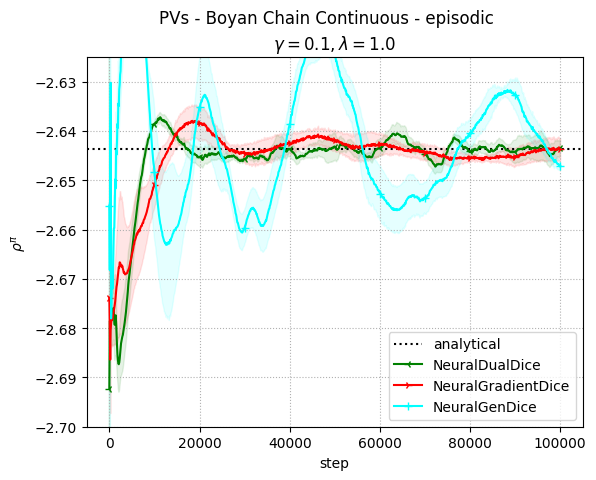

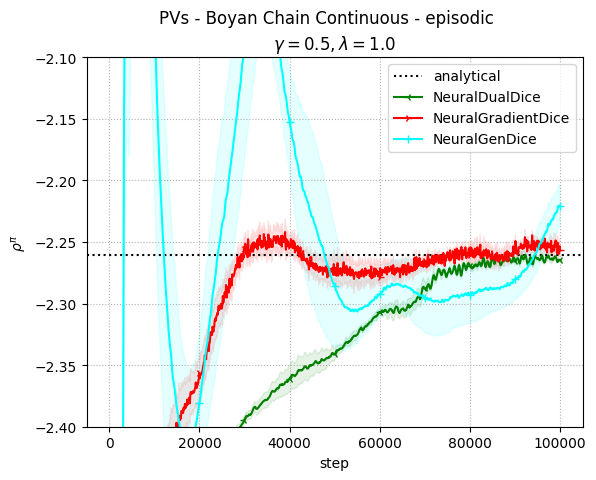

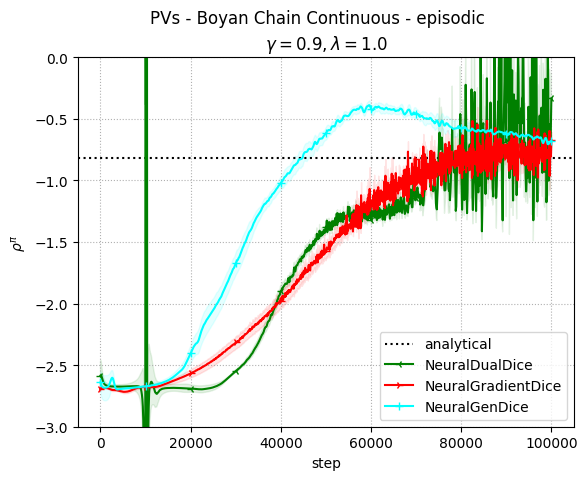

In [15]:
for gamma, ylim in zip(gammas_e, [[-2.7, -2.625], [-2.4, -2.1], [-3, 0]]):

    plot_pv(
        logs_e[gamma],
        analytical=analytical_solver["e"].solve(gamma)[0],
        suptitle="PVs - Boyan Chain Continuous - episodic",
        title=r"$\gamma=" + str(gamma) + r", \lambda=1.0$",
        labels=labels_e,
        colors=colors_e,
        markers=markers_e,
        ylim=ylim,
    )

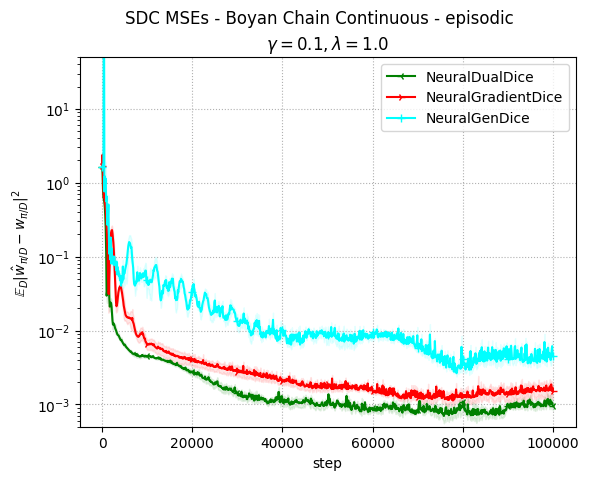

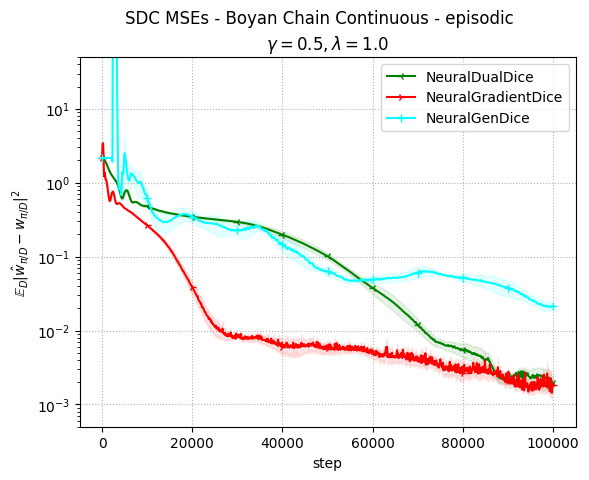

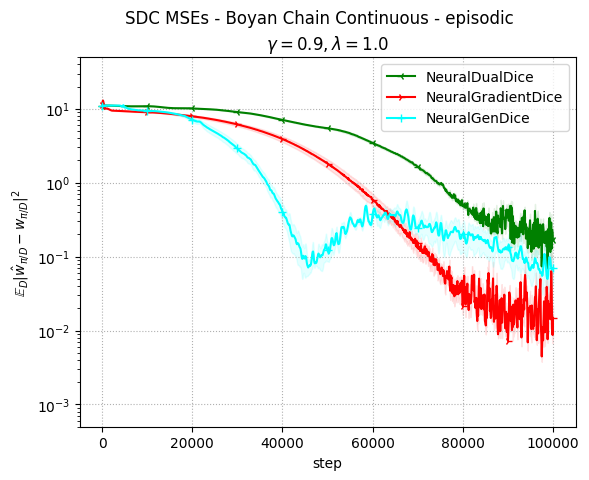

In [16]:
for gamma in gammas_e:

    plot_sdc(
        logs_e[gamma],
        suptitle="SDC MSEs - Boyan Chain Continuous - episodic",
        title=r"$\gamma=" + str(gamma) + r", \lambda=1.0$",
        labels=labels_e,
        colors=colors_e,
        markers=markers_e,
    )

## Continuing

In [10]:
gammas_c = [1.0]
algorithms_c = ["NeuralGradientDice", "NeuralGenDice"]
hparam_str_evaluation_c = {
    (1.0, "NeuralGradientDice"): "gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg0.1",
    (1.0, "NeuralGenDice"):      "gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg0.5",
}

logs_c = { gamma: { algorithm: {} for algorithm in algorithms_c } for gamma in gammas_c }

for gamma in gammas_c:
    for algorithm in algorithms_c:
        for seed in seeds:
            logs_c[gamma][algorithm][seed] = get_logs(
                log_dir=os.path.join(
                    outputs_dir, hparam_str_policy, hparam_str_dataset[seed]["c"],
                    algorithm,
                    hparam_str_evaluation_c[(gamma, algorithm)],
                )
            )

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGradientDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg0.1/events.out.tfevents.1729811625.MacBook-Pro-von-Richard.local.2732.3.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=1_num_experience=100000_N=12_kind=continuing/NeuralGradientDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg0.1/events.out.tfevents.1729945852.MacBook-Pro-von-Richard.local.42935.1.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=2_num_experience=100000_N=12_kind=continuing/NeuralGradientDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg0.1/events.out.tfevents.1729950226.MacBook-Pro-von-Richard.local.42935.3.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=3_num_experience=100000_N=12_kind=continuing/NeuralGradientDice/gam1.0_nstep100000_batchs64_hdp

In [11]:
labels_c = [ algorithm + ", " + r"$\lambda=" + str(lam) + "$" for algorithm, lam in zip(algorithms_c, [0.5, 0.1]) ]

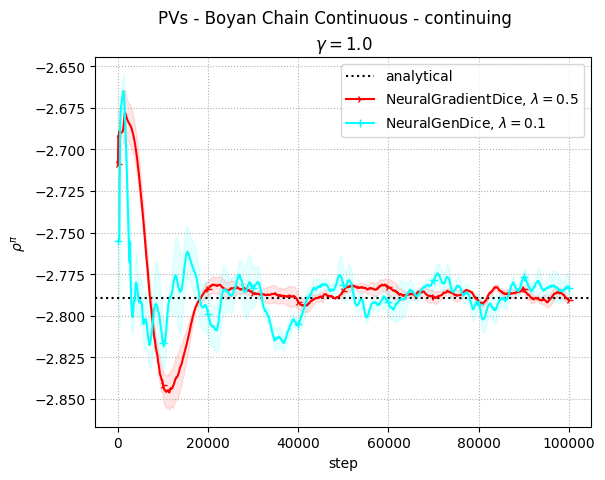

In [17]:
for gamma, ylim in zip(gammas_c, [None]):

    plot_pv(
        logs_c[gamma],
        analytical=analytical_solver["c"].solve(gamma, primal_dual="dual")[0],
        suptitle="PVs - Boyan Chain Continuous - continuing",
        title="$" + r"\gamma=" + str(gamma) + "$",
        labels=labels_c,
        colors=colors_c,
        markers=markers_c,
        ylim=ylim,
    )

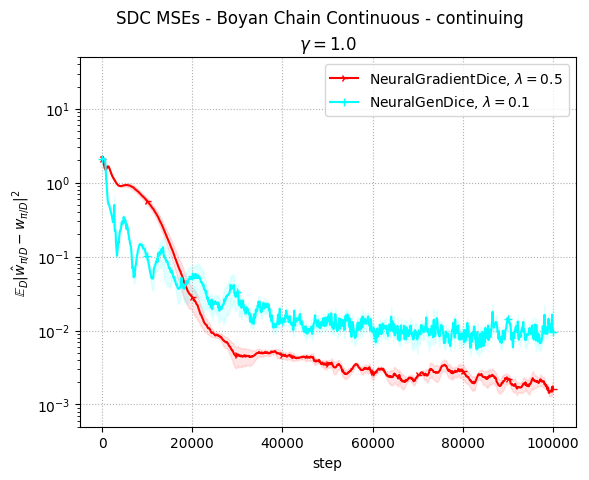

In [18]:
for gamma, ylim in zip(gammas_c, [None]):

    plot_sdc(
        logs_c[gamma],
        suptitle="SDC MSEs - Boyan Chain Continuous - continuing",
        title="$" + r"\gamma=" + str(gamma) + "$",
        labels=labels_c,
        colors=colors_c,
        markers=markers_c,
    )

# All Plots

## DualDICE

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.05_lrd0.05_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1725913717.MacBook-Pro-von-Richard.local.20712.0.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.05_lrd0.05_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1725915484.MacBook-Pro-von-Richard.local.20712.1.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.05_lrd0.05_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1725917256.MacBook-Pro-von-Richard.local.20712.2.v2


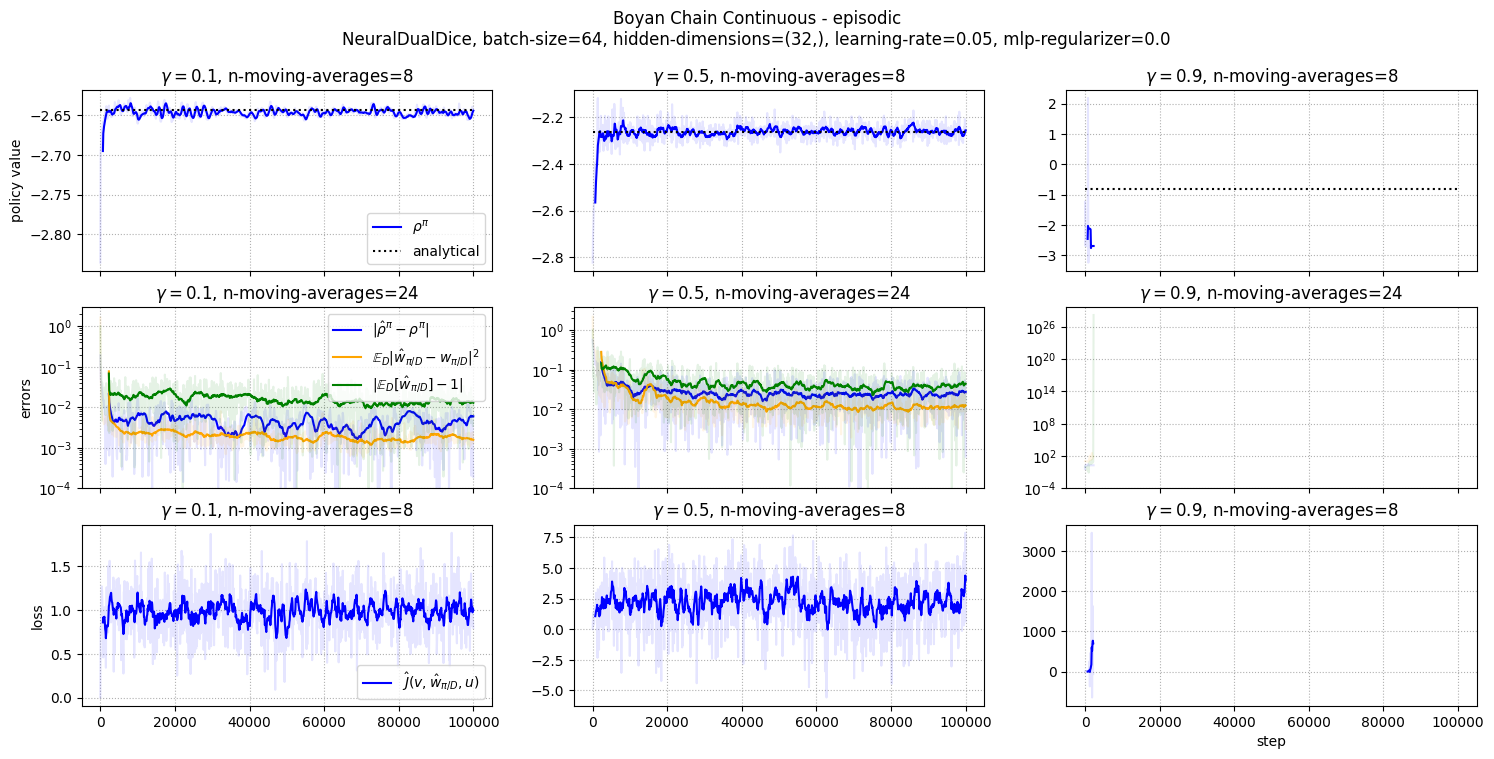

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1725919027.MacBook-Pro-von-Richard.local.20712.3.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1725920808.MacBook-Pro-von-Richard.local.20712.4.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1725922590.MacBook-Pro-von-Richard.local.20712.5.v2


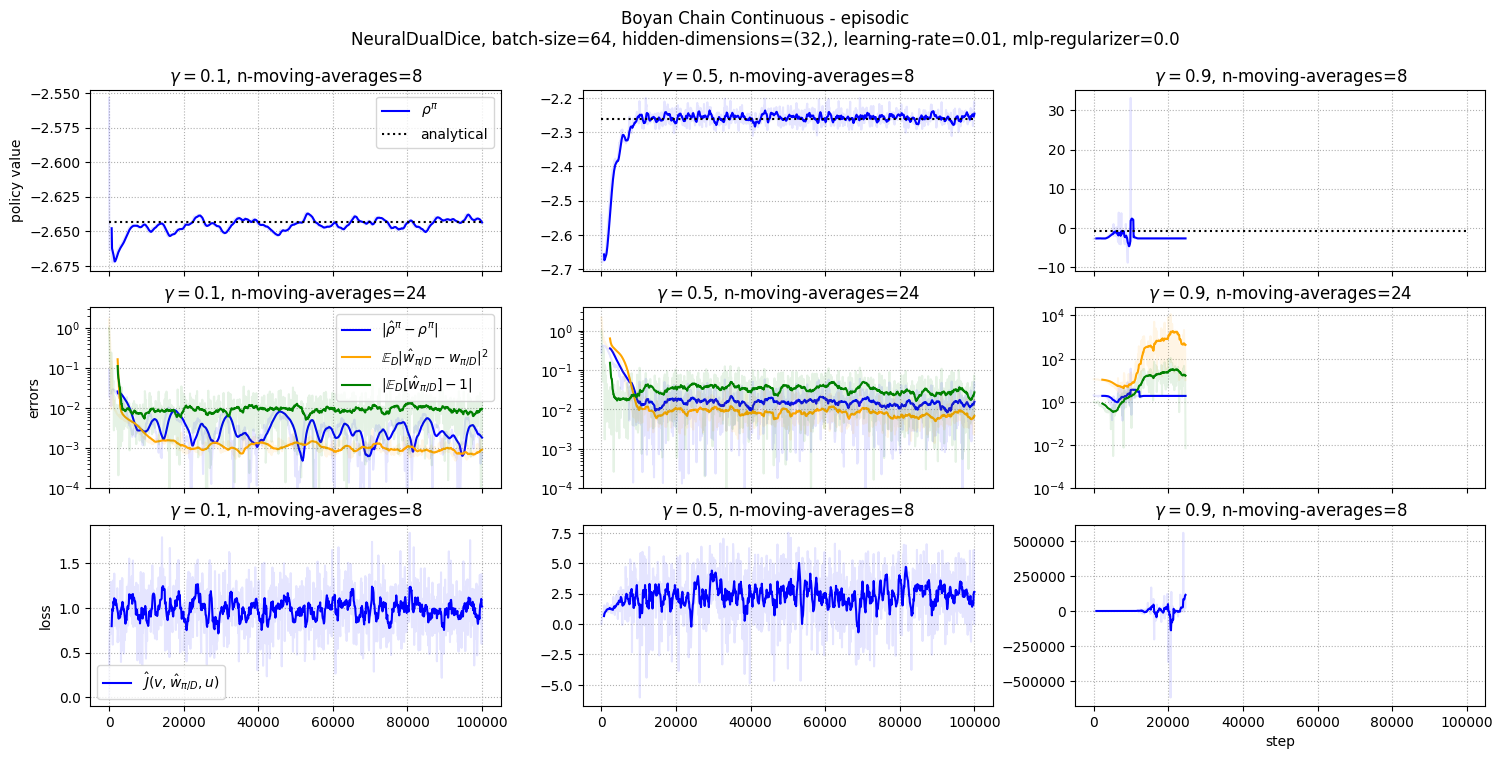

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1725924375.MacBook-Pro-von-Richard.local.20712.6.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1725926159.MacBook-Pro-von-Richard.local.20712.7.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1725927947.MacBook-Pro-von-Richard.local.20712.8.v2


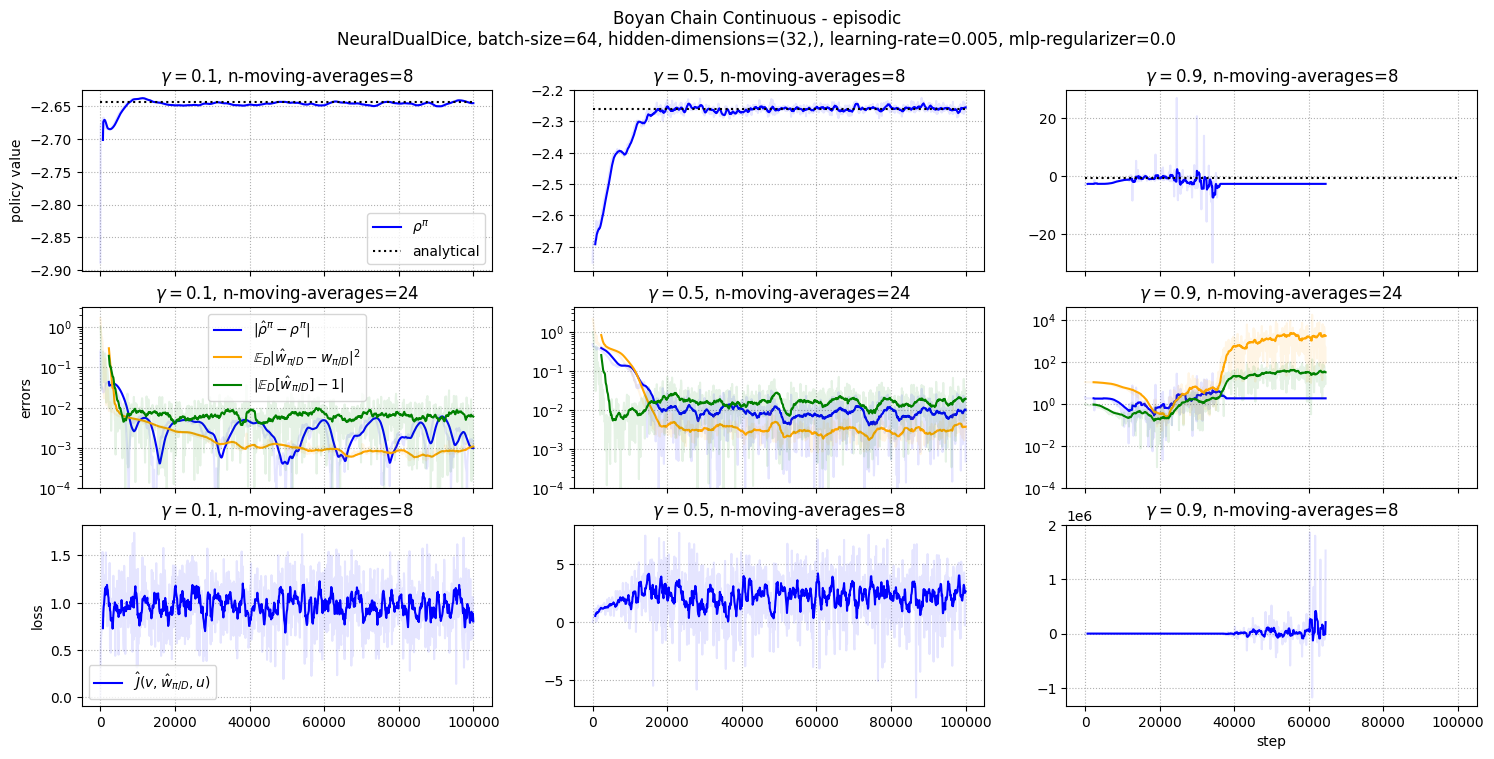

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1725929738.MacBook-Pro-von-Richard.local.20712.9.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1725931530.MacBook-Pro-von-Richard.local.20712.10.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1725933323.MacBook-Pro-von-Richard.local.20712.11.v2


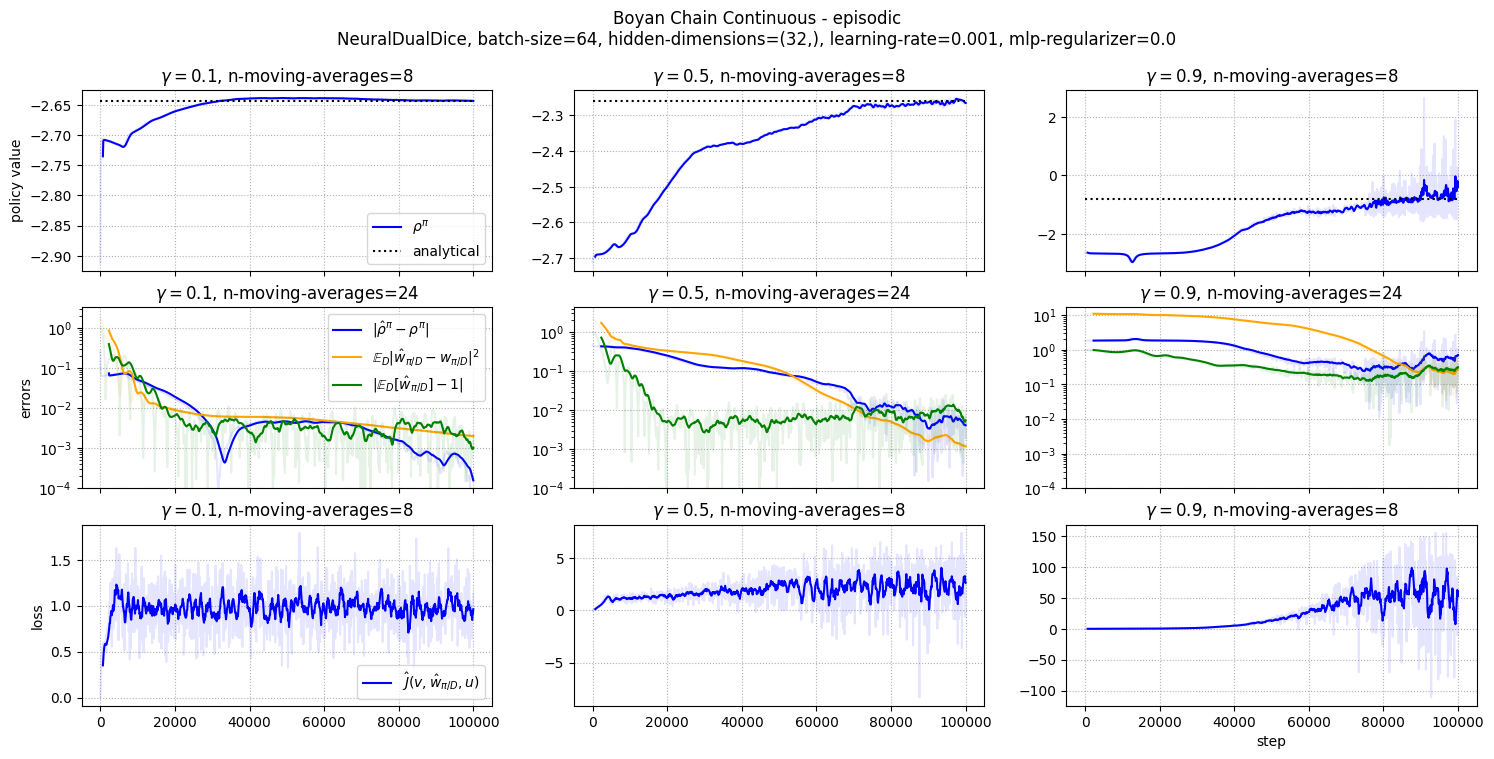

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1725959421.e246-029.eduroam.tuwien.ac.at.25816.0.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1725961218.e246-029.eduroam.tuwien.ac.at.25816.1.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralDualDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1725963039.e246-029.eduroam.tuwien.ac.at.25816.2.v2


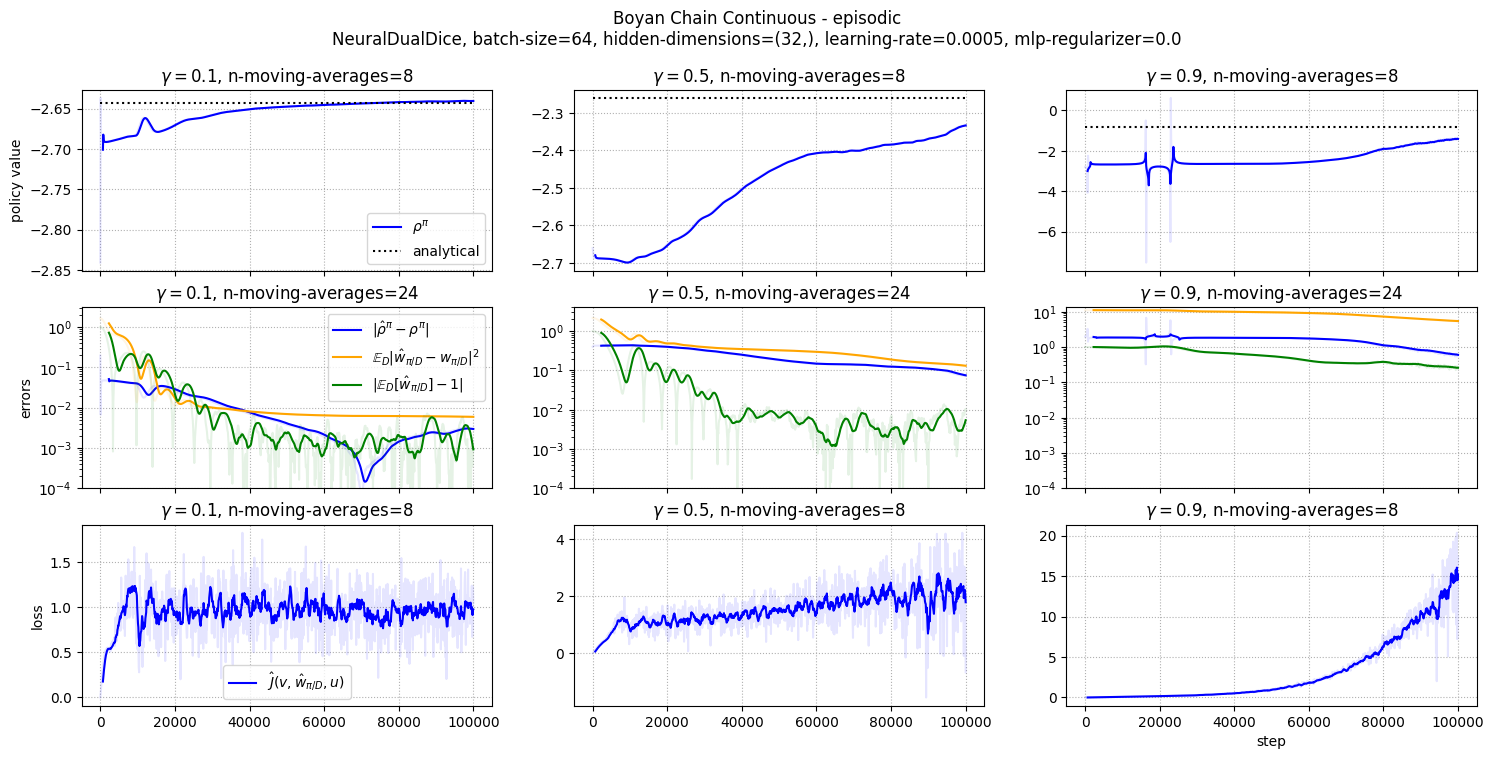

In [106]:
for lr in [0.05, 0.01, 0.005, 0.001, 0.0005]:
    get_plot_logs(
        analytical_solver["e"],
        #
        outputs_dir,
        hparam_str_policy, hparam_str_dataset[0]["e"],
        "NeuralDualDice", hparam_str_evaluation=[
            f"gam{gam}_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_fexp1.5"
                for gam in [0.1, 0.5, 0.9]
        ],
        #
        ylim_2=(10**-4, None),
        n_ma_1=8, n_ma_2=24, n_ma_3=8,
        #
        save_dir=save_dir_images,
    )

## GenDICE

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGenDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.05_lrd0.05_regp0.0_regd0.0_nlr0.05_nreg1.0/events.out.tfevents.1725994296.MacBook-Pro-von-Richard.local.38028.0.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGenDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.05_lrd0.05_regp0.0_regd0.0_nlr0.05_nreg1.0/events.out.tfevents.1726043297.MacBook-Pro-von-Richard.local.44922.0.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGenDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.05_lrd0.05_regp0.0_regd0.0_nlr0.05_nreg1.0/events.out.tfevents.1725996432.MacBook-Pro-von-Richard.local.38028.1.v2


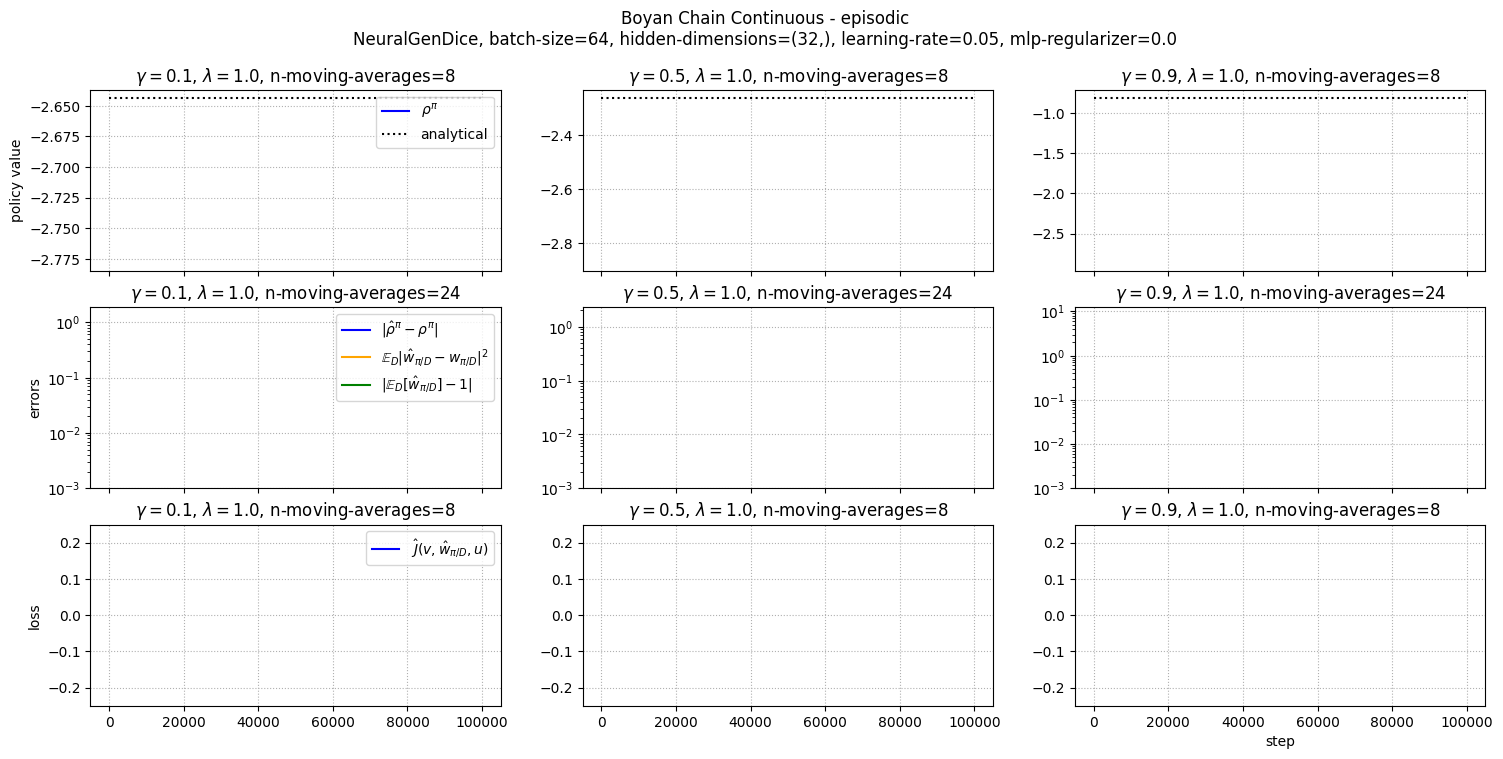

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGenDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg1.0/events.out.tfevents.1725895654.MacBook-Pro-von-Richard.local.16858.0.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGenDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg1.0/events.out.tfevents.1725897794.MacBook-Pro-von-Richard.local.16858.1.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGenDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg1.0/events.out.tfevents.1725899932.MacBook-Pro-von-Richard.local.16858.2.v2


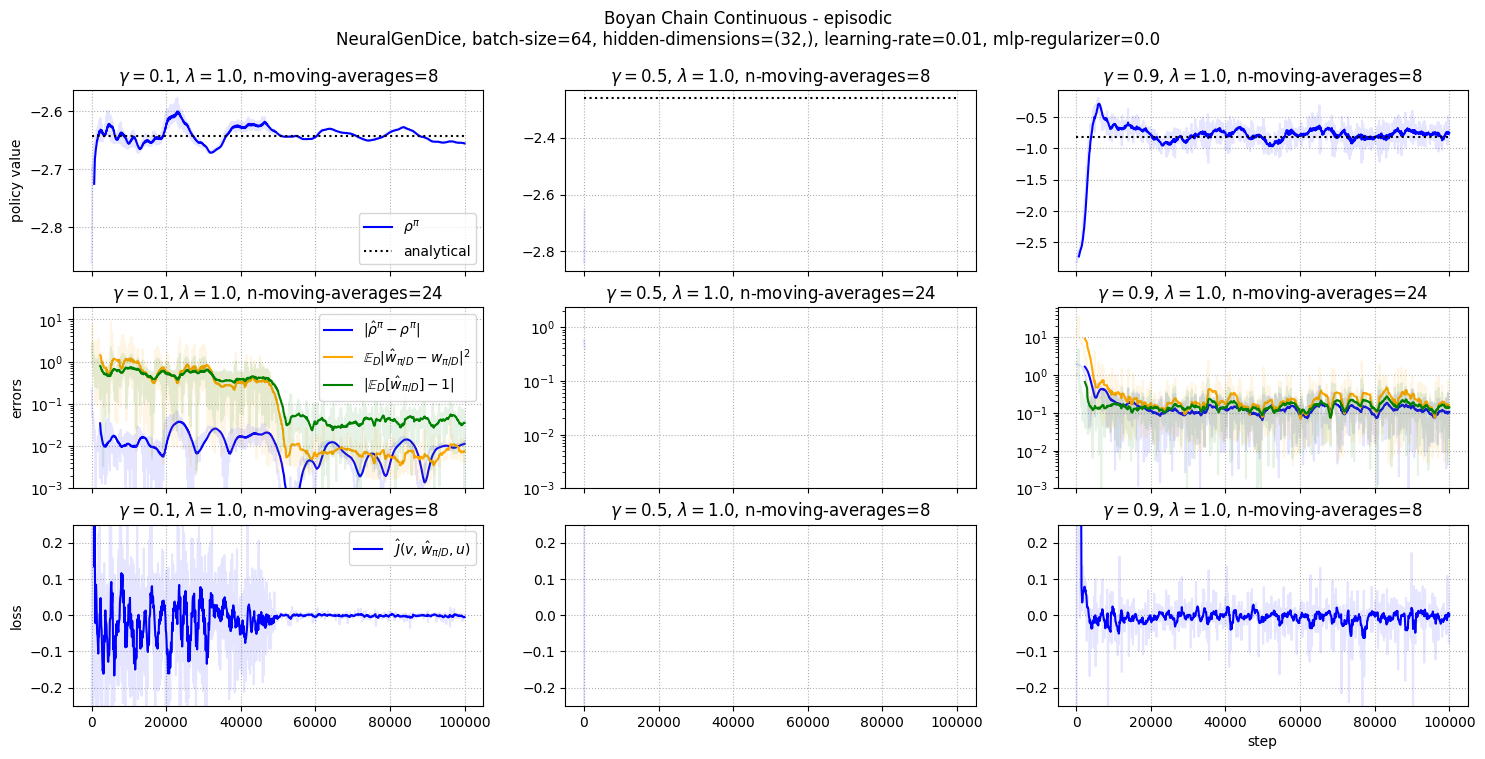

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGenDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg1.0/events.out.tfevents.1725998564.MacBook-Pro-von-Richard.local.38028.2.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGenDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg1.0/events.out.tfevents.1726045478.MacBook-Pro-von-Richard.local.44922.1.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGenDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg1.0/events.out.tfevents.1726000701.MacBook-Pro-von-Richard.local.38028.3.v2


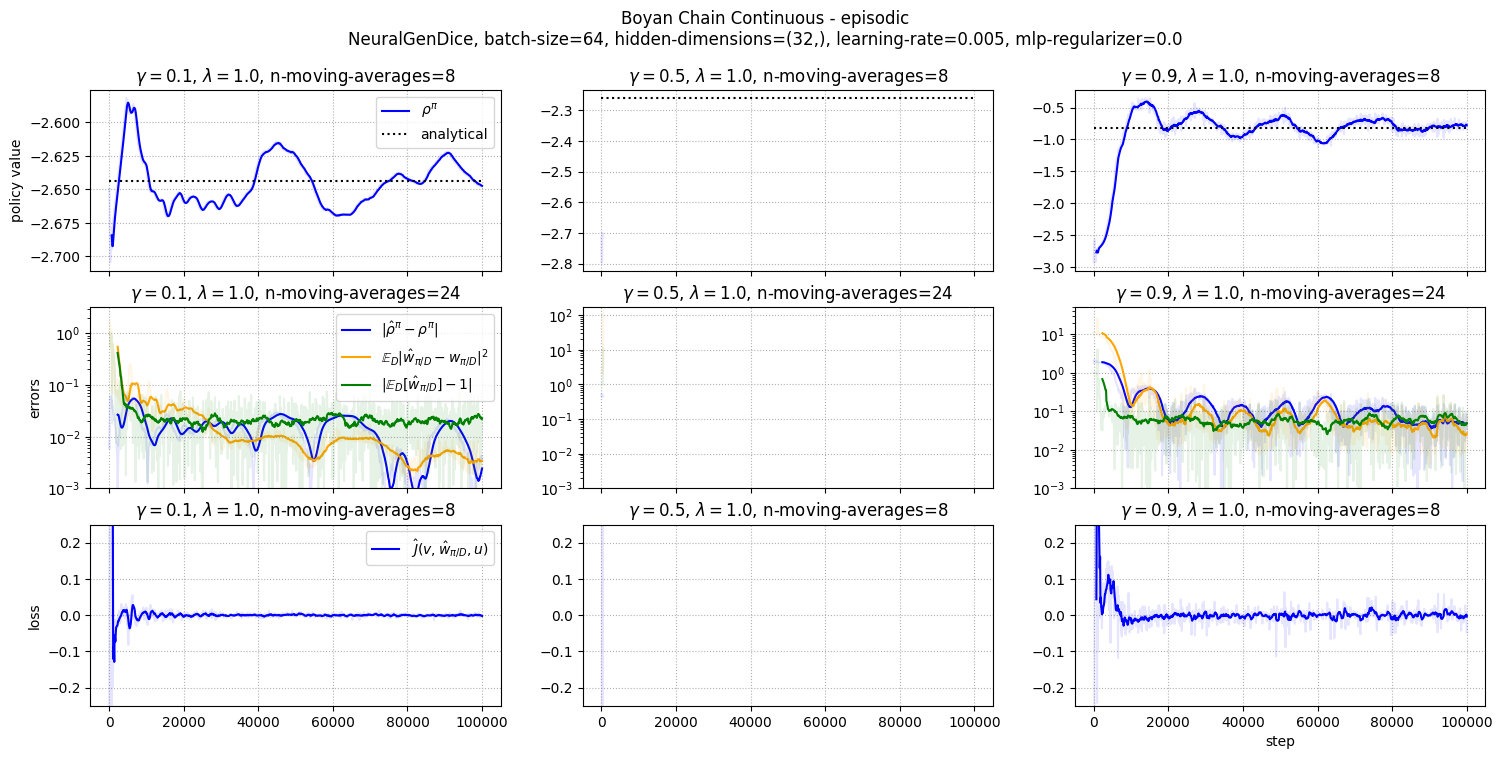

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGenDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1725964879.e246-029.eduroam.tuwien.ac.at.25816.3.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGenDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1725910297.MacBook-Pro-von-Richard.local.19970.0.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGenDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1725967148.e246-029.eduroam.tuwien.ac.at.25816.4.v2


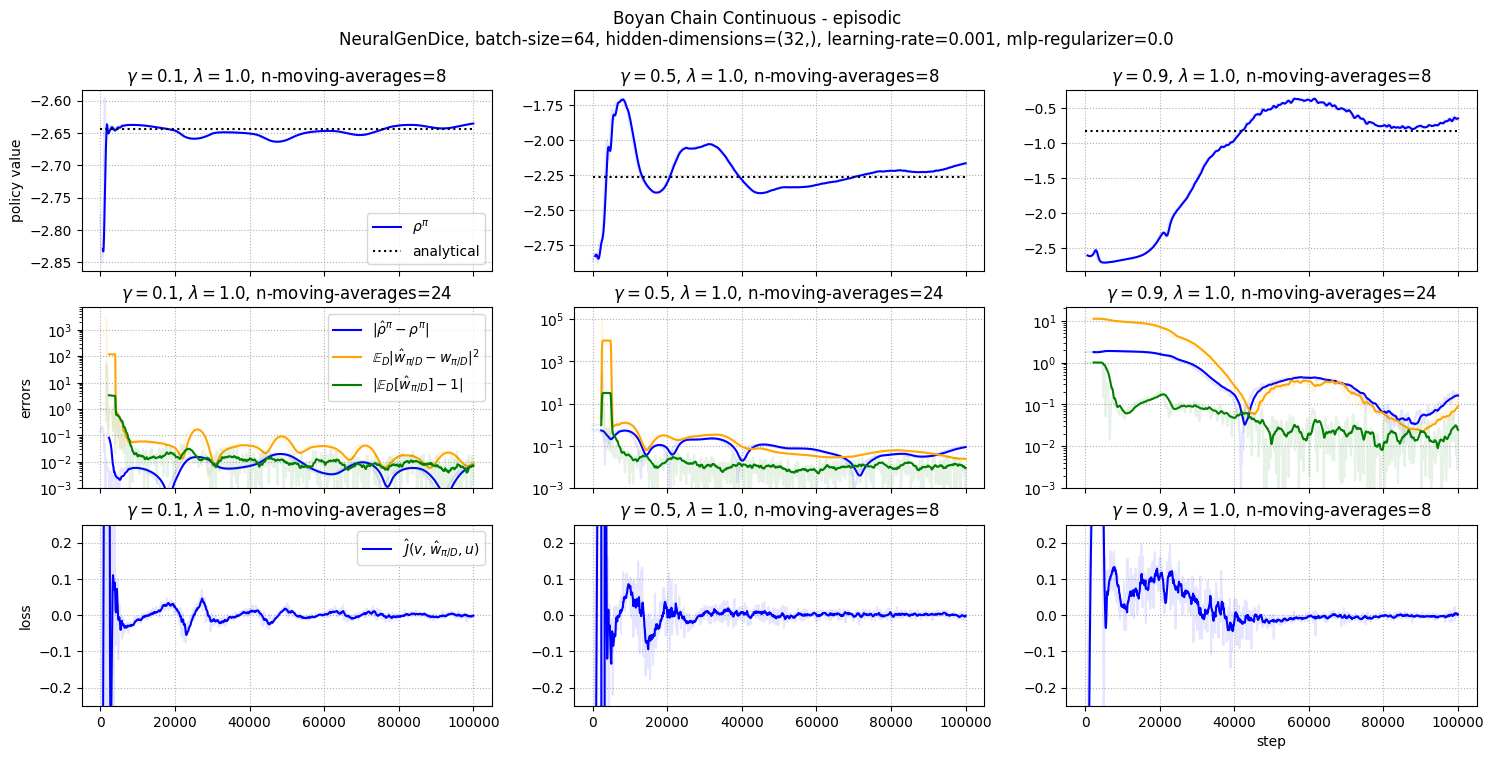

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGenDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0/events.out.tfevents.1726002846.MacBook-Pro-von-Richard.local.38028.4.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGenDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0/events.out.tfevents.1726047894.MacBook-Pro-von-Richard.local.44922.2.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGenDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0/events.out.tfevents.1726004982.MacBook-Pro-von-Richard.local.38028.5.v2


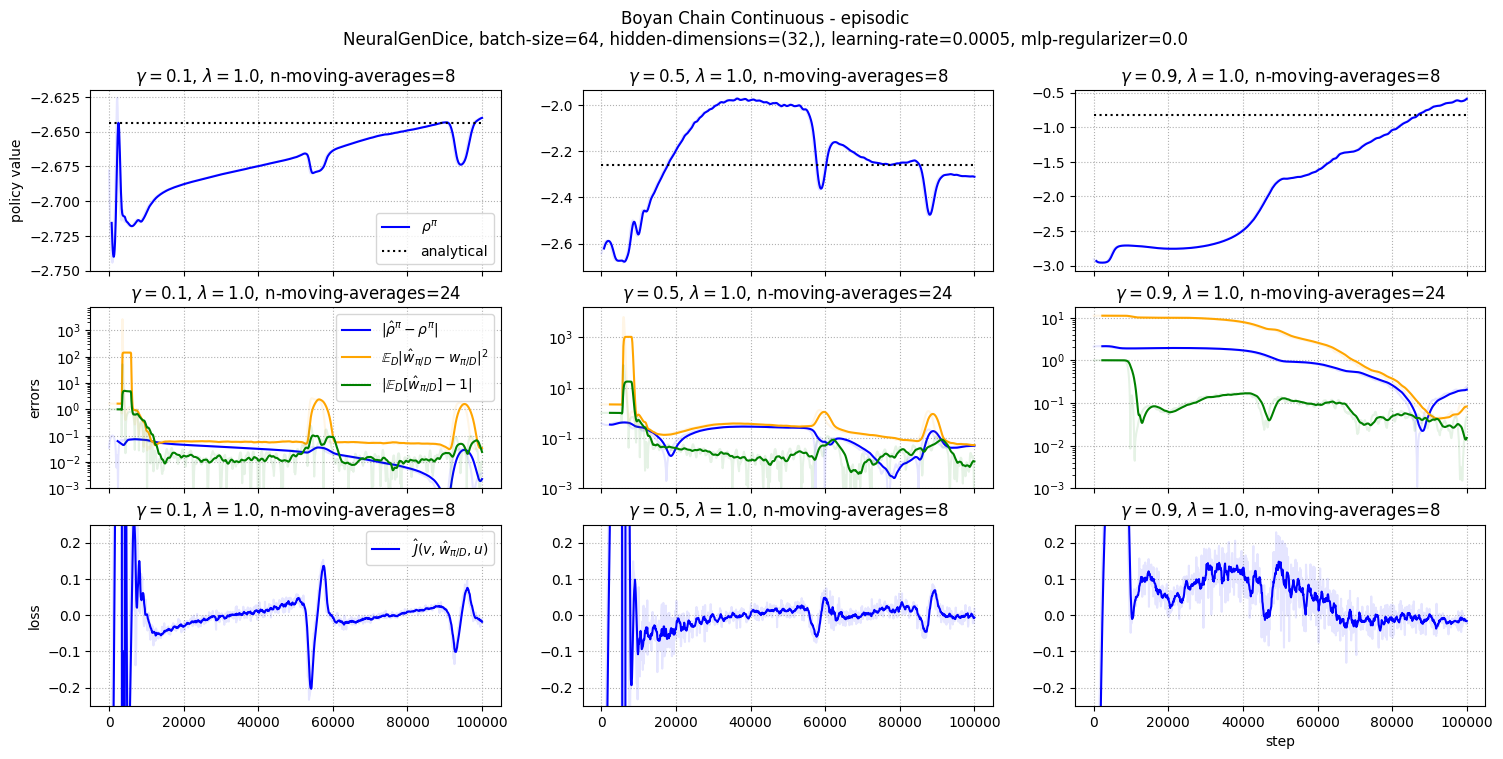

In [107]:
for lr in [0.05, 0.01, 0.005, 0.001, 0.0005]:
    get_plot_logs(
        analytical_solver["e"],
        #
        outputs_dir,
        hparam_str_policy, hparam_str_dataset[0]["e"],
        "NeuralGenDice", hparam_str_evaluation=[
            f"gam{gam}_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg1.0"
                for gam in [0.1, 0.5, 0.9]
        ],
        #
        ylim_2=(10**-3, None), ylim_3=(-0.25, 0.25),
        n_ma_1=8, n_ma_2=24, n_ma_3=8,
        #
        save_dir=save_dir_images,
    )

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGenDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg0.0/events.out.tfevents.1729805083.MacBook-Pro-von-Richard.local.2732.0.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGenDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg0.1/events.out.tfevents.1729809434.MacBook-Pro-von-Richard.local.2732.2.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGenDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg0.5/events.out.tfevents.1729813817.MacBook-Pro-von-Richard.local.2732.4.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGenDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01

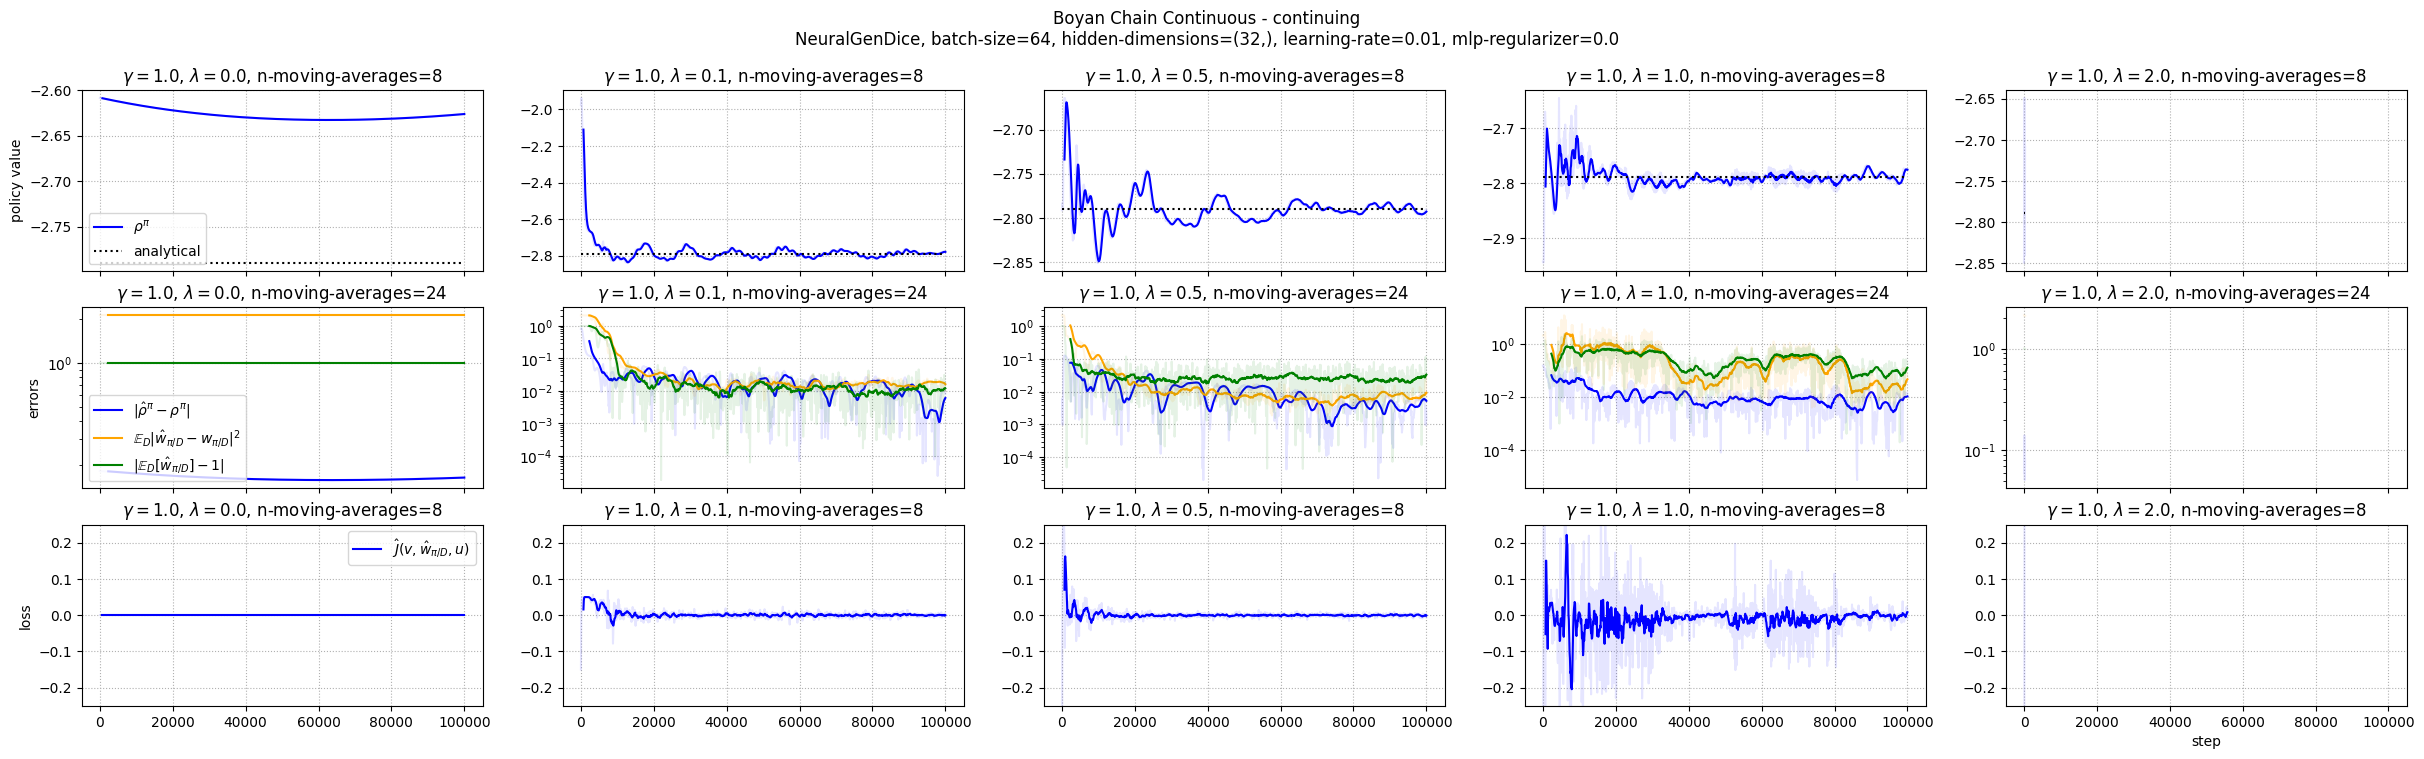

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGenDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg0.0/events.out.tfevents.1729824816.MacBook-Pro-von-Richard.local.2732.10.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGenDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg0.1/events.out.tfevents.1729829227.MacBook-Pro-von-Richard.local.2732.12.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGenDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg0.5/events.out.tfevents.1729833633.MacBook-Pro-von-Richard.local.2732.14.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGenDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(

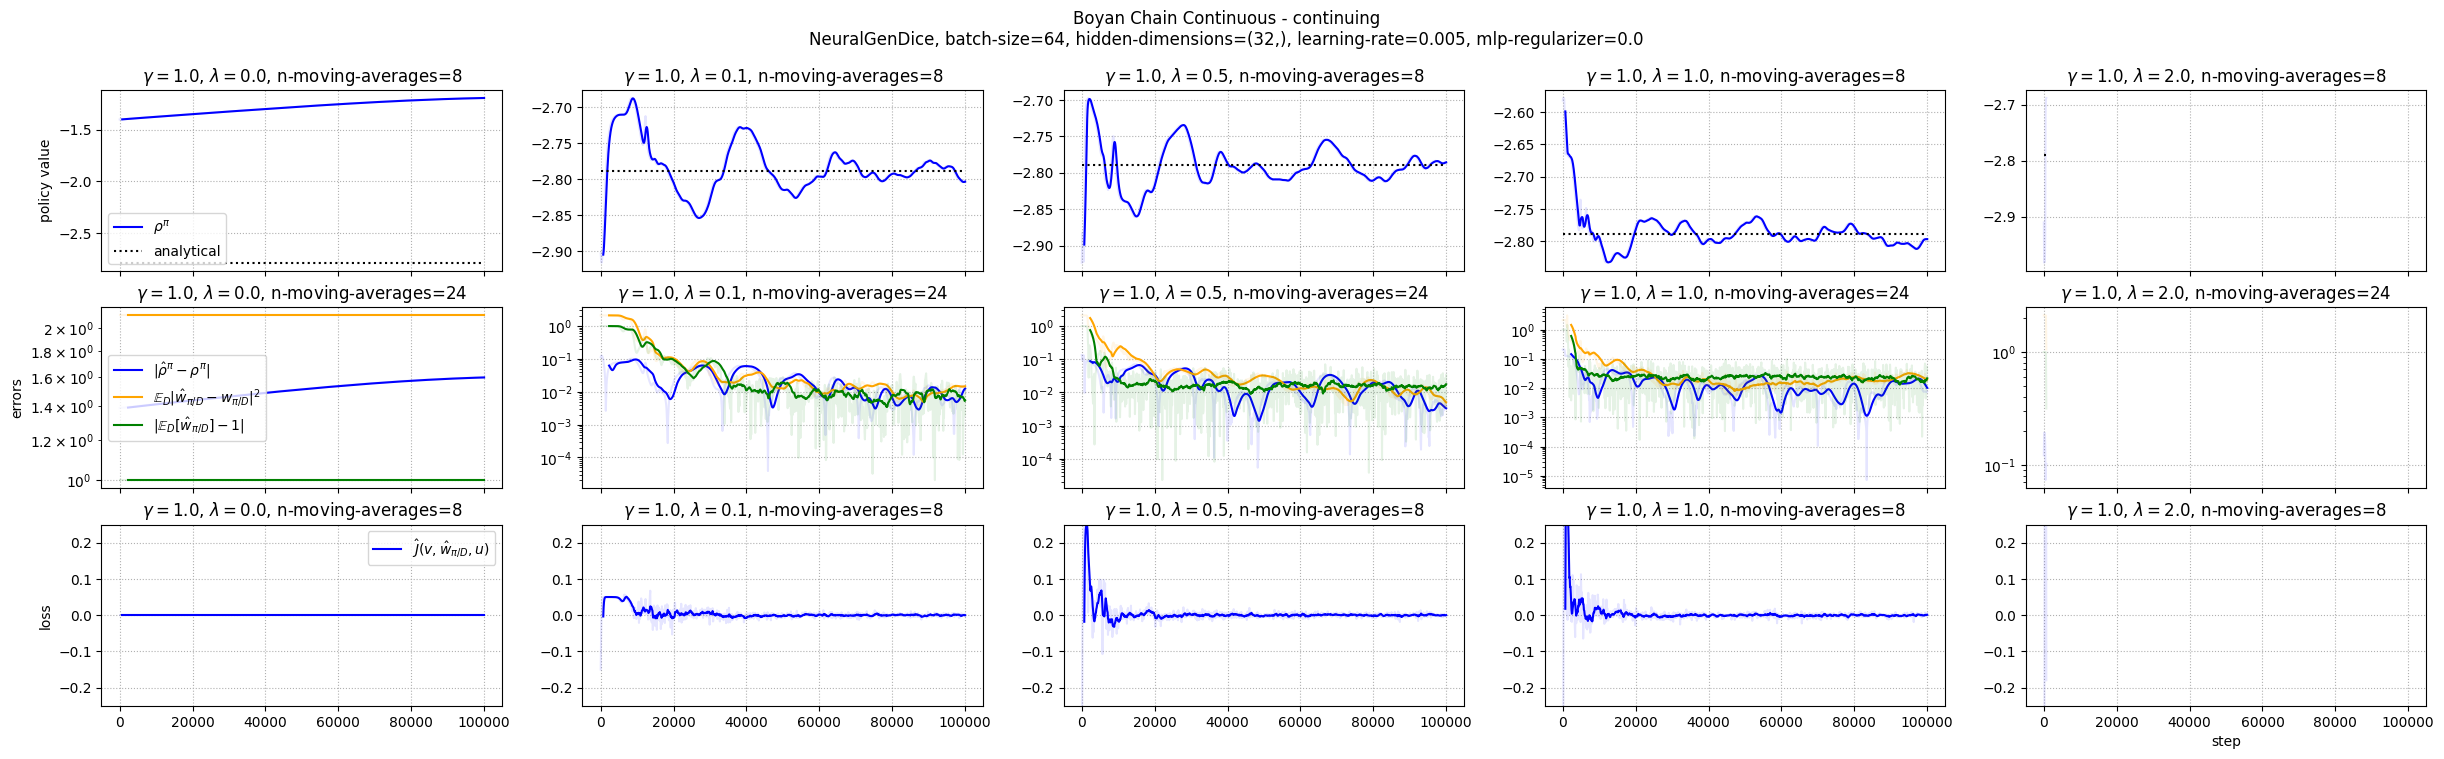

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGenDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg0.0/events.out.tfevents.1729844622.MacBook-Pro-von-Richard.local.2732.20.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGenDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg0.1/events.out.tfevents.1729848971.MacBook-Pro-von-Richard.local.2732.22.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGenDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg0.5/events.out.tfevents.1729853659.MacBook-Pro-von-Richard.local.2732.24.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGenDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(

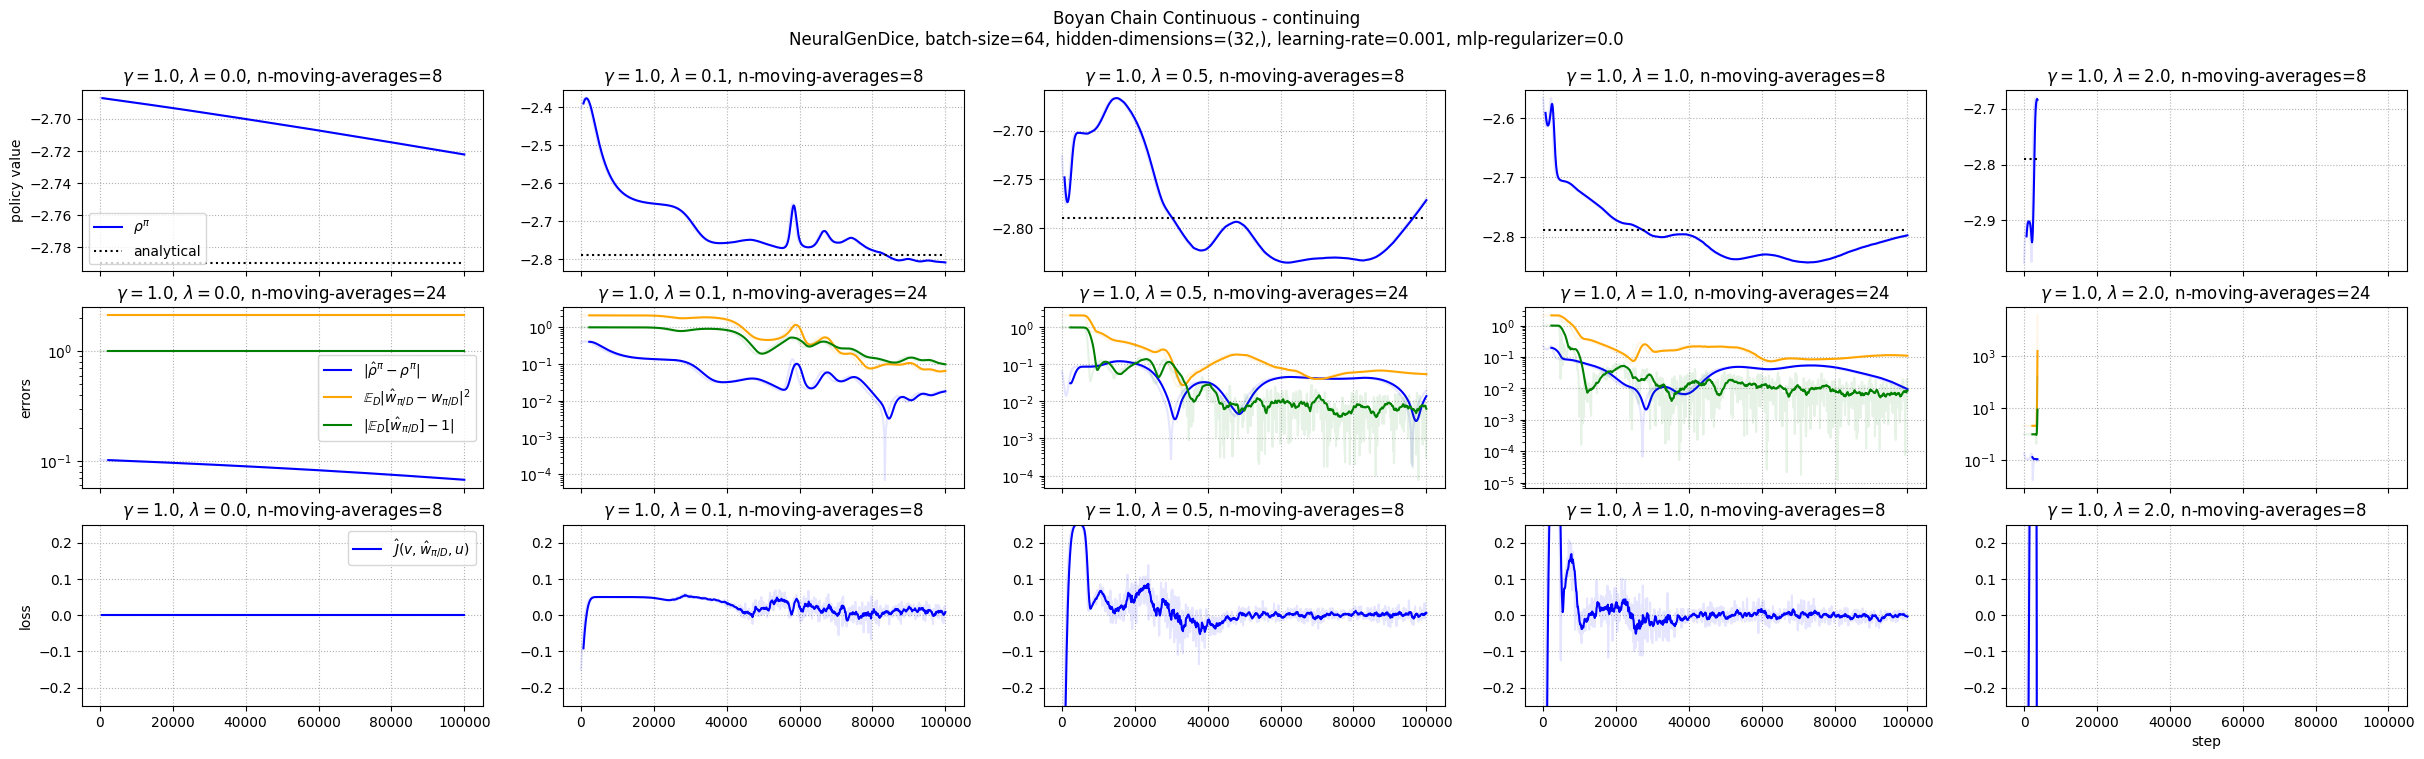

In [108]:
for lr in [0.01, 0.005, 0.001]:
    get_plot_logs(
        analytical_solver["c"],
        #
        outputs_dir,
        hparam_str_policy, hparam_str_dataset[0]["c"],
        "NeuralGenDice", hparam_str_evaluation=[
            f"gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg{nreg}"
                for nreg in [0.0, 0.1, 0.5, 1.0, 2.0]
        ],
        ylim_3=(-0.25, 0.25),
        n_ma_1=8, n_ma_2=24, n_ma_3=8,
        #
        save_dir=save_dir_images,
    )

## GradientDICE

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGradientDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.05_lrd0.05_regp0.0_regd0.0_nlr0.05_nreg1.0/events.out.tfevents.1725969303.e246-029.eduroam.tuwien.ac.at.25816.5.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGradientDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.05_lrd0.05_regp0.0_regd0.0_nlr0.05_nreg1.0/events.out.tfevents.1725971459.e246-029.eduroam.tuwien.ac.at.25816.6.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGradientDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.05_lrd0.05_regp0.0_regd0.0_nlr0.05_nreg1.0/events.out.tfevents.1725973723.e246-029.eduroam.tuwien.ac.at.25816.7.v2


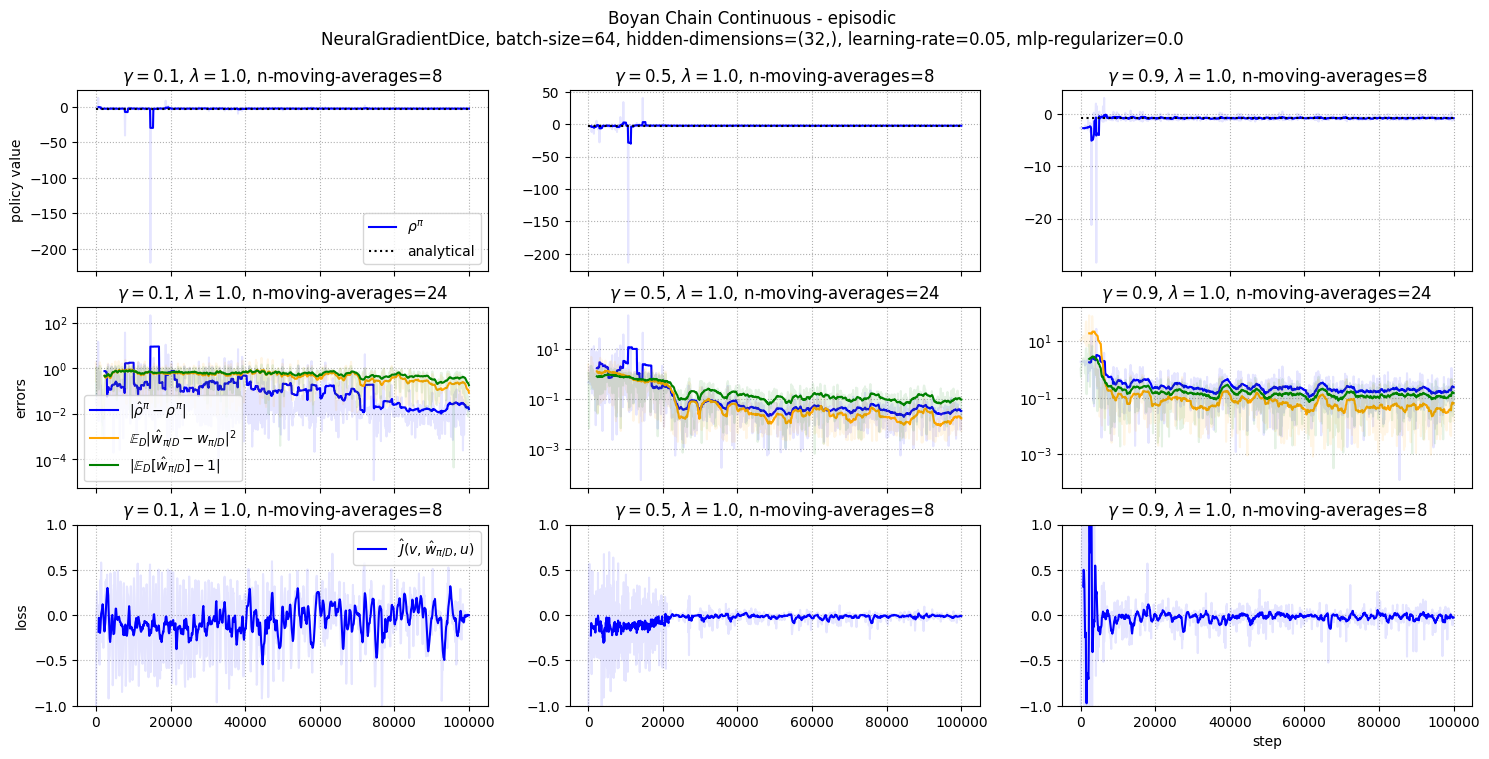

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGradientDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg1.0/events.out.tfevents.1725902071.MacBook-Pro-von-Richard.local.16858.3.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGradientDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg1.0/events.out.tfevents.1725904221.MacBook-Pro-von-Richard.local.16858.4.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGradientDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg1.0/events.out.tfevents.1725881562.MacBook-Pro-von-Richard.local.14268.0.v2


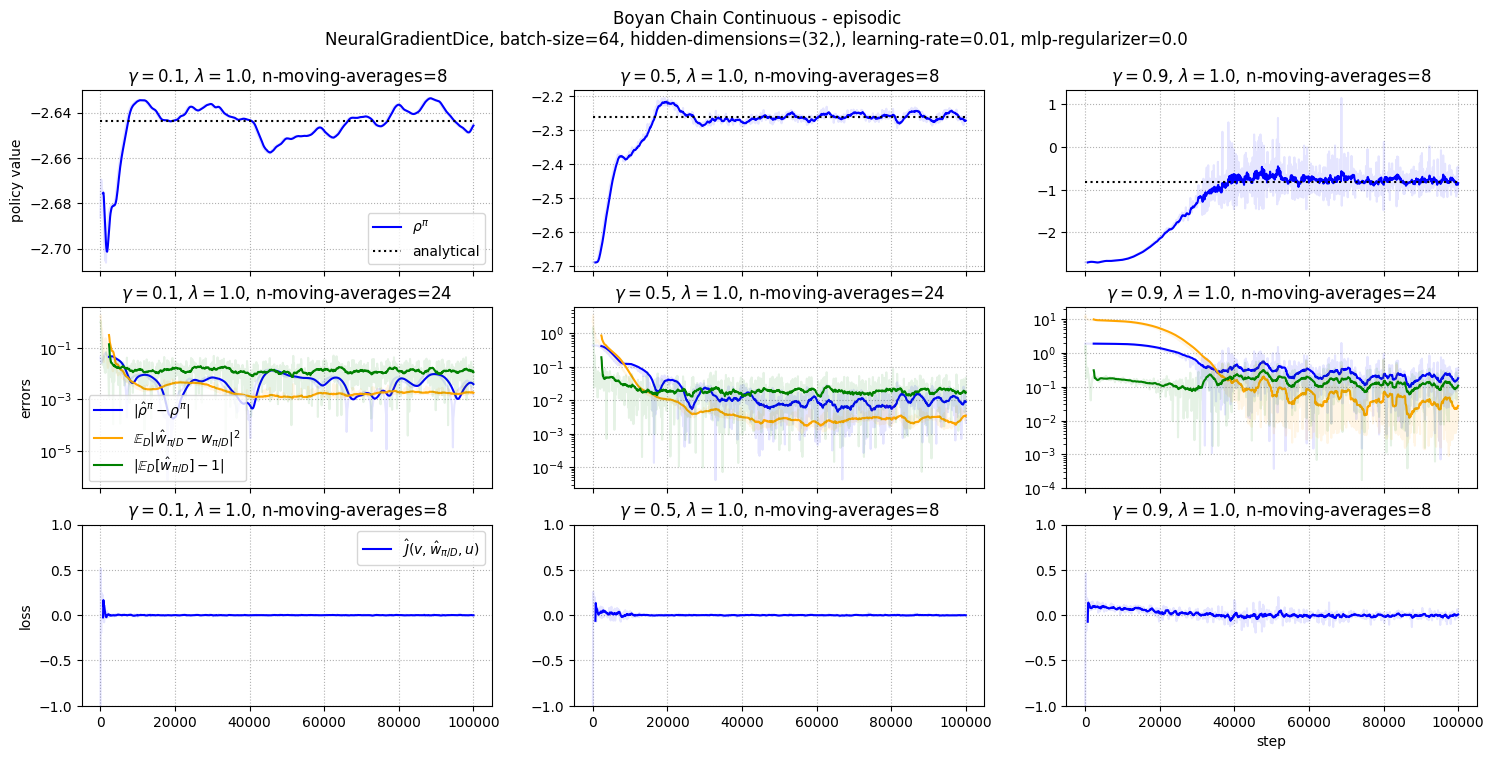

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGradientDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg1.0/events.out.tfevents.1726007121.MacBook-Pro-von-Richard.local.38028.6.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGradientDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg1.0/events.out.tfevents.1725978292.e246-029.eduroam.tuwien.ac.at.25816.9.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGradientDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg1.0/events.out.tfevents.1726011420.MacBook-Pro-von-Richard.local.38028.8.v2


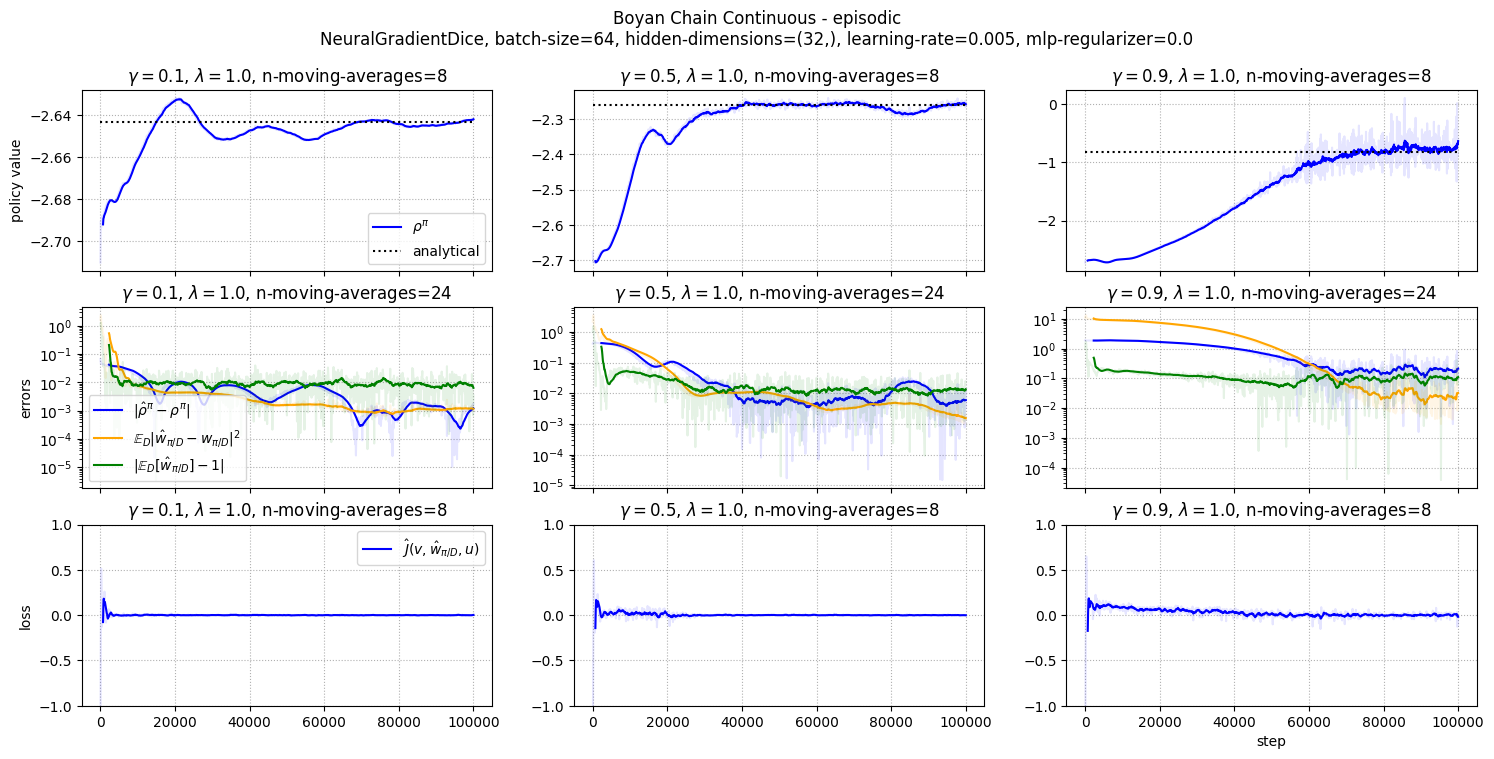

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGradientDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1725986503.MacBook-Pro-von-Richard.local.25816.11.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGradientDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1725988700.MacBook-Pro-von-Richard.local.25816.12.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGradientDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1725990897.MacBook-Pro-von-Richard.local.25816.13.v2


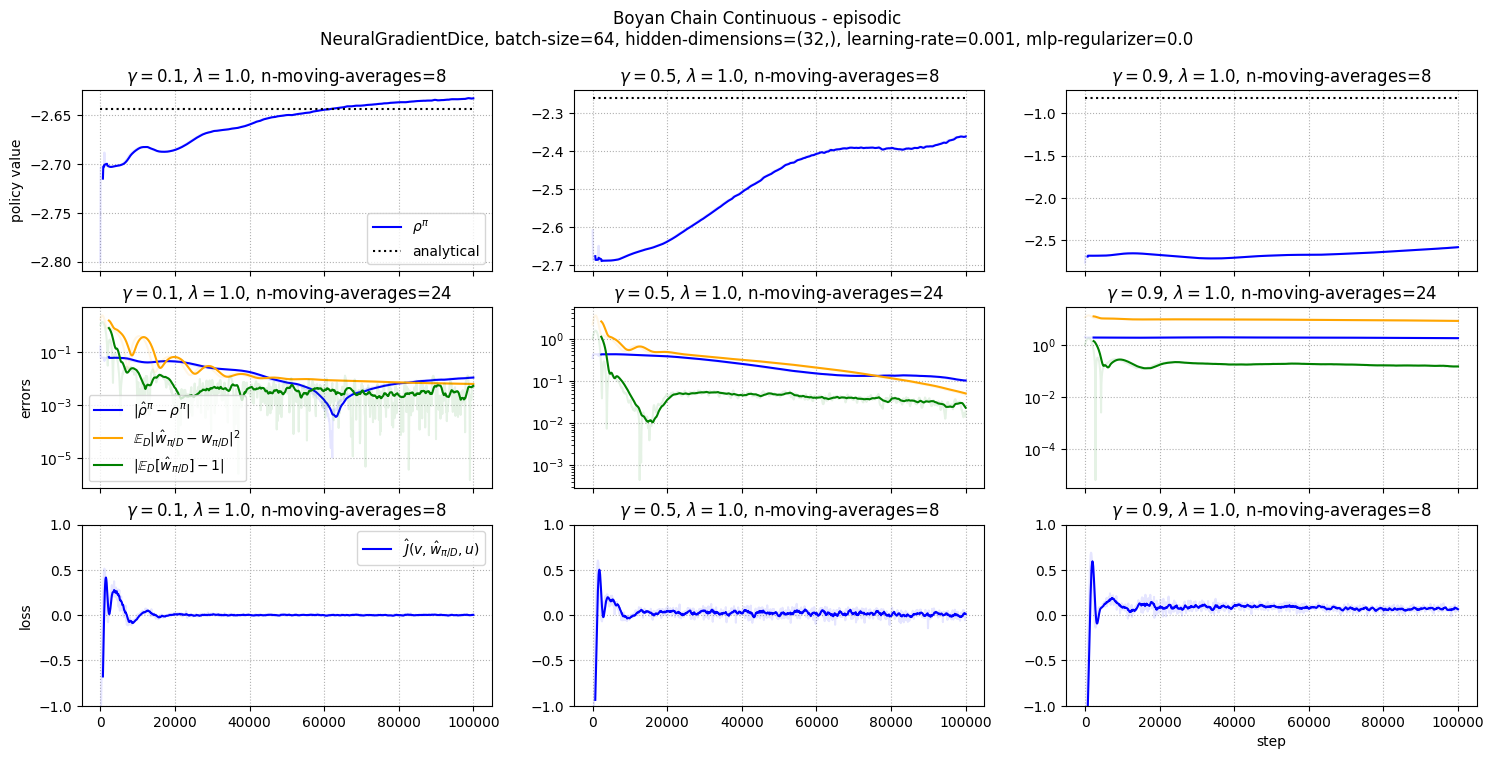

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGradientDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0/events.out.tfevents.1726050257.MacBook-Pro-von-Richard.local.44922.3.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGradientDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0/events.out.tfevents.1726052650.MacBook-Pro-von-Richard.local.44922.4.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=episodic/NeuralGradientDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0/events.out.tfevents.1726055040.MacBook-Pro-von-Richard.local.44922.5.v2


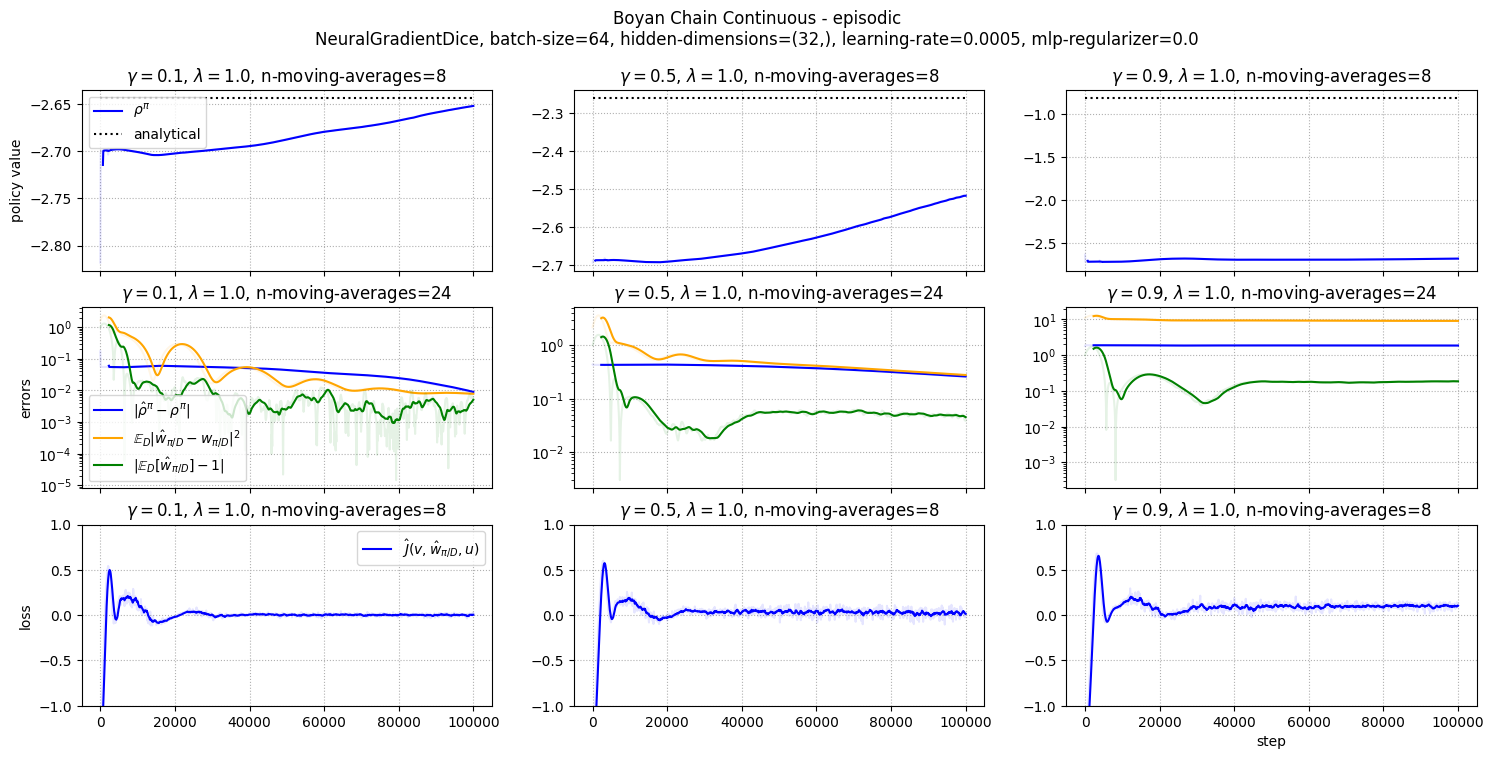

In [109]:
for lr in [0.05, 0.01, 0.005, 0.001, 0.0005]:
    get_plot_logs(
        analytical_solver["e"],
        #
        outputs_dir,
        hparam_str_policy, hparam_str_dataset[0]["e"],
        "NeuralGradientDice", hparam_str_evaluation=[
            f"gam{gam}_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg1.0"
                for gam in [0.1, 0.5, 0.9]
        ],
        ylim_3=(-1, 1),
        n_ma_1=8, n_ma_2=24, n_ma_3=8,
        #
        save_dir=save_dir_images,
    )

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGradientDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg0.0/events.out.tfevents.1729807250.MacBook-Pro-von-Richard.local.2732.1.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGradientDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg0.1/events.out.tfevents.1729811625.MacBook-Pro-von-Richard.local.2732.3.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGradientDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg0.5/events.out.tfevents.1729816002.MacBook-Pro-von-Richard.local.2732.5.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGradientDice/gam1.0_nstep100000_batchs64_hdp(3

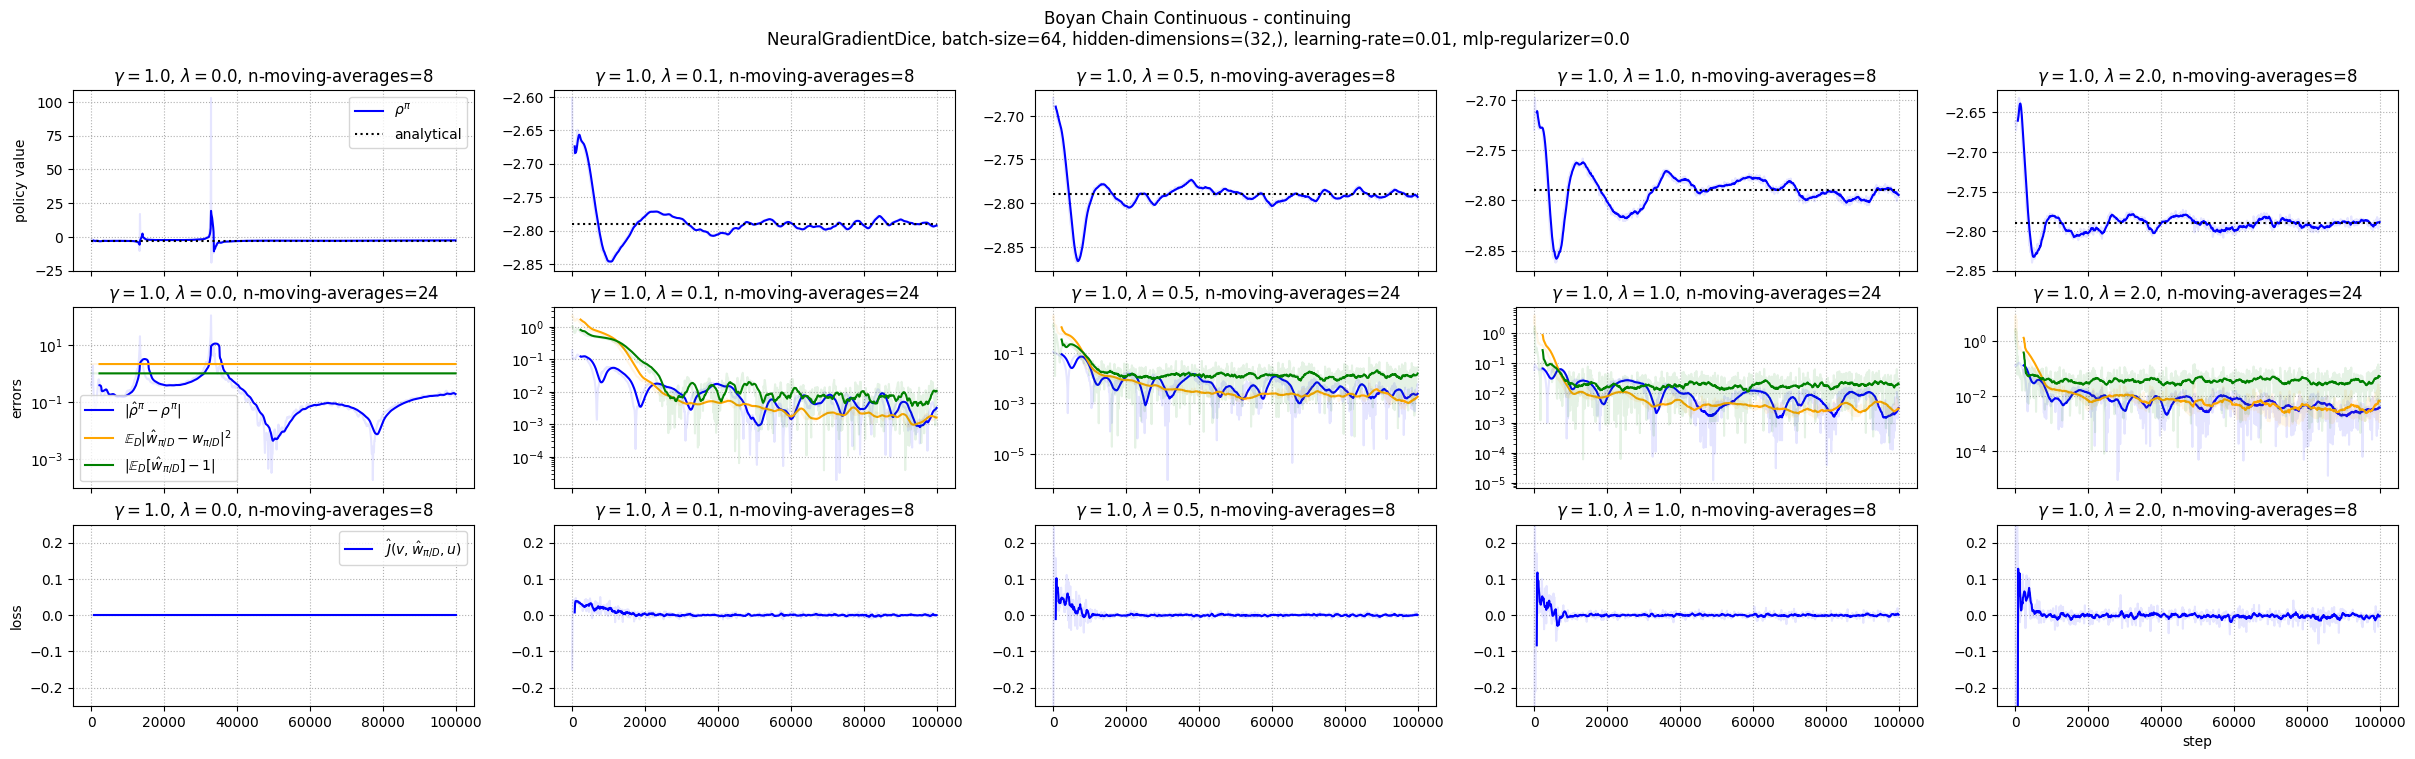

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGradientDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg0.0/events.out.tfevents.1729827021.MacBook-Pro-von-Richard.local.2732.11.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGradientDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg0.1/events.out.tfevents.1729831422.MacBook-Pro-von-Richard.local.2732.13.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGradientDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg0.5/events.out.tfevents.1729835835.MacBook-Pro-von-Richard.local.2732.15.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGradientDice/gam1.0_nstep100000_ba

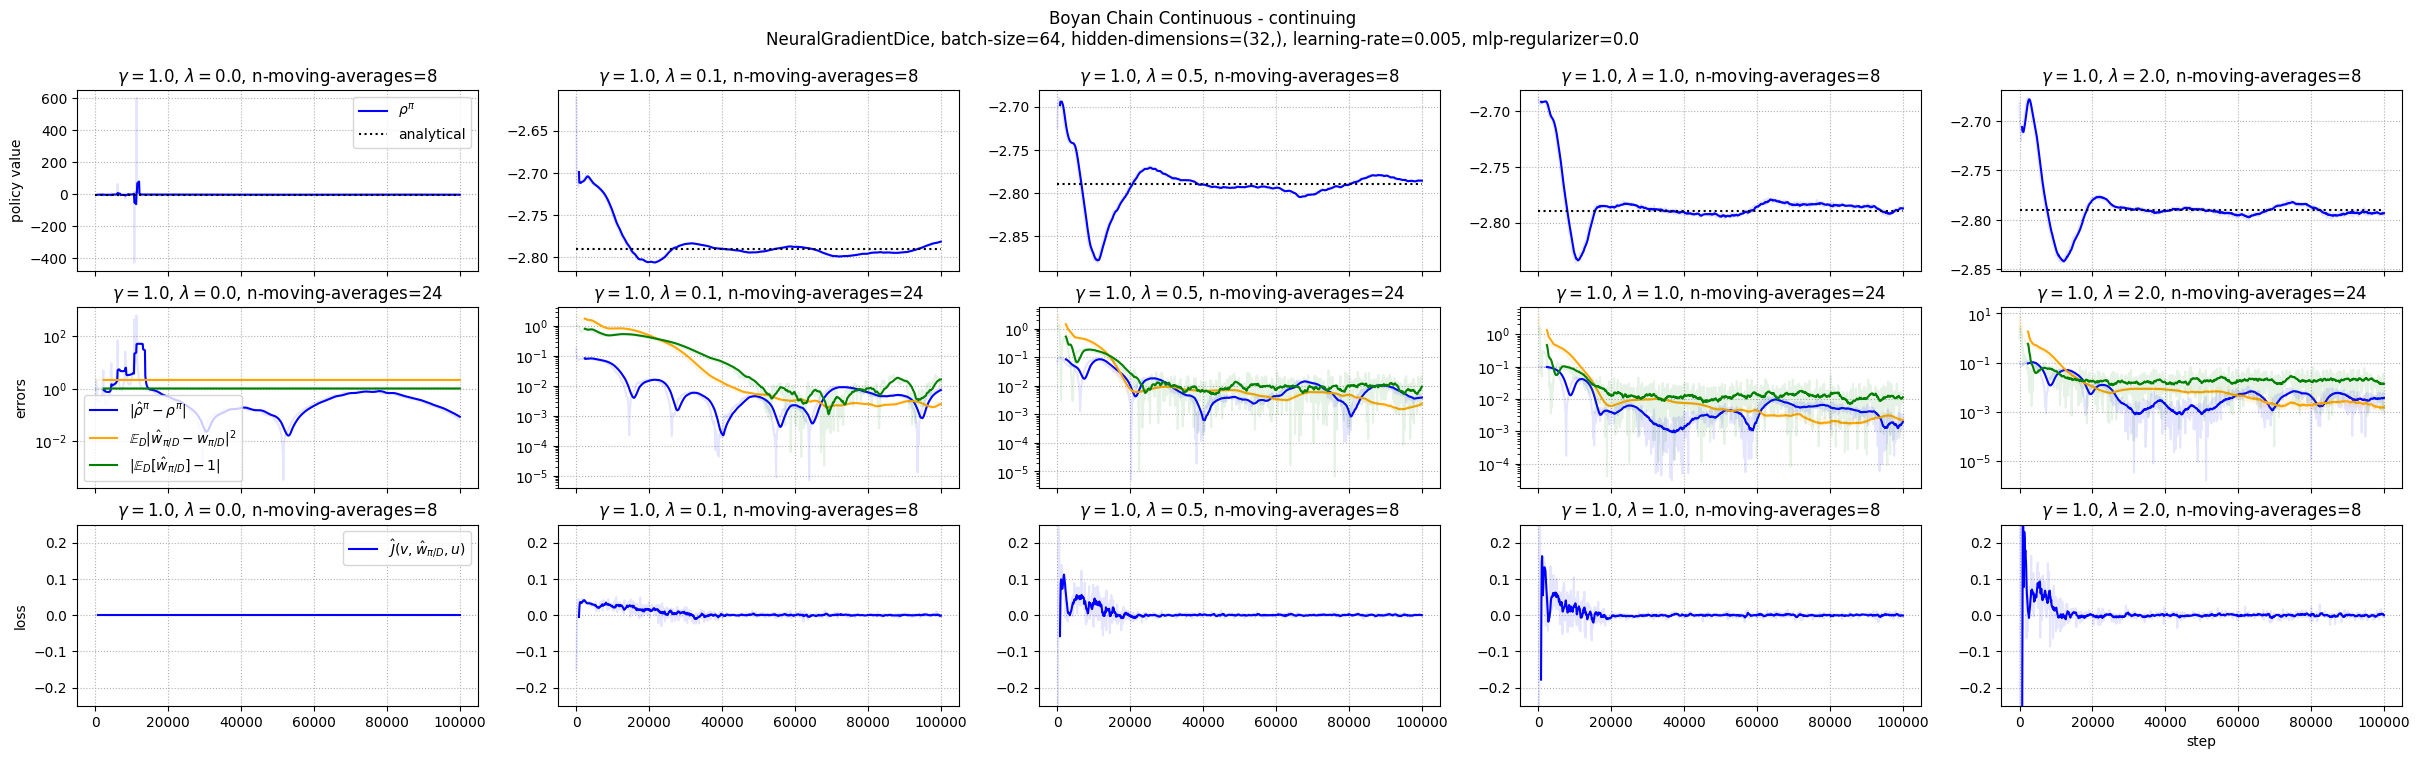

Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGradientDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg0.0/events.out.tfevents.1729846797.MacBook-Pro-von-Richard.local.2732.21.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGradientDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg0.1/events.out.tfevents.1729851297.MacBook-Pro-von-Richard.local.2732.23.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGradientDice/gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg0.5/events.out.tfevents.1729856159.MacBook-Pro-von-Richard.local.2732.25.v2
Getting log: data/boyan_chain/outputs/p=0.1_N=12/seed=0_num_experience=100000_N=12_kind=continuing/NeuralGradientDice/gam1.0_nstep100000_ba

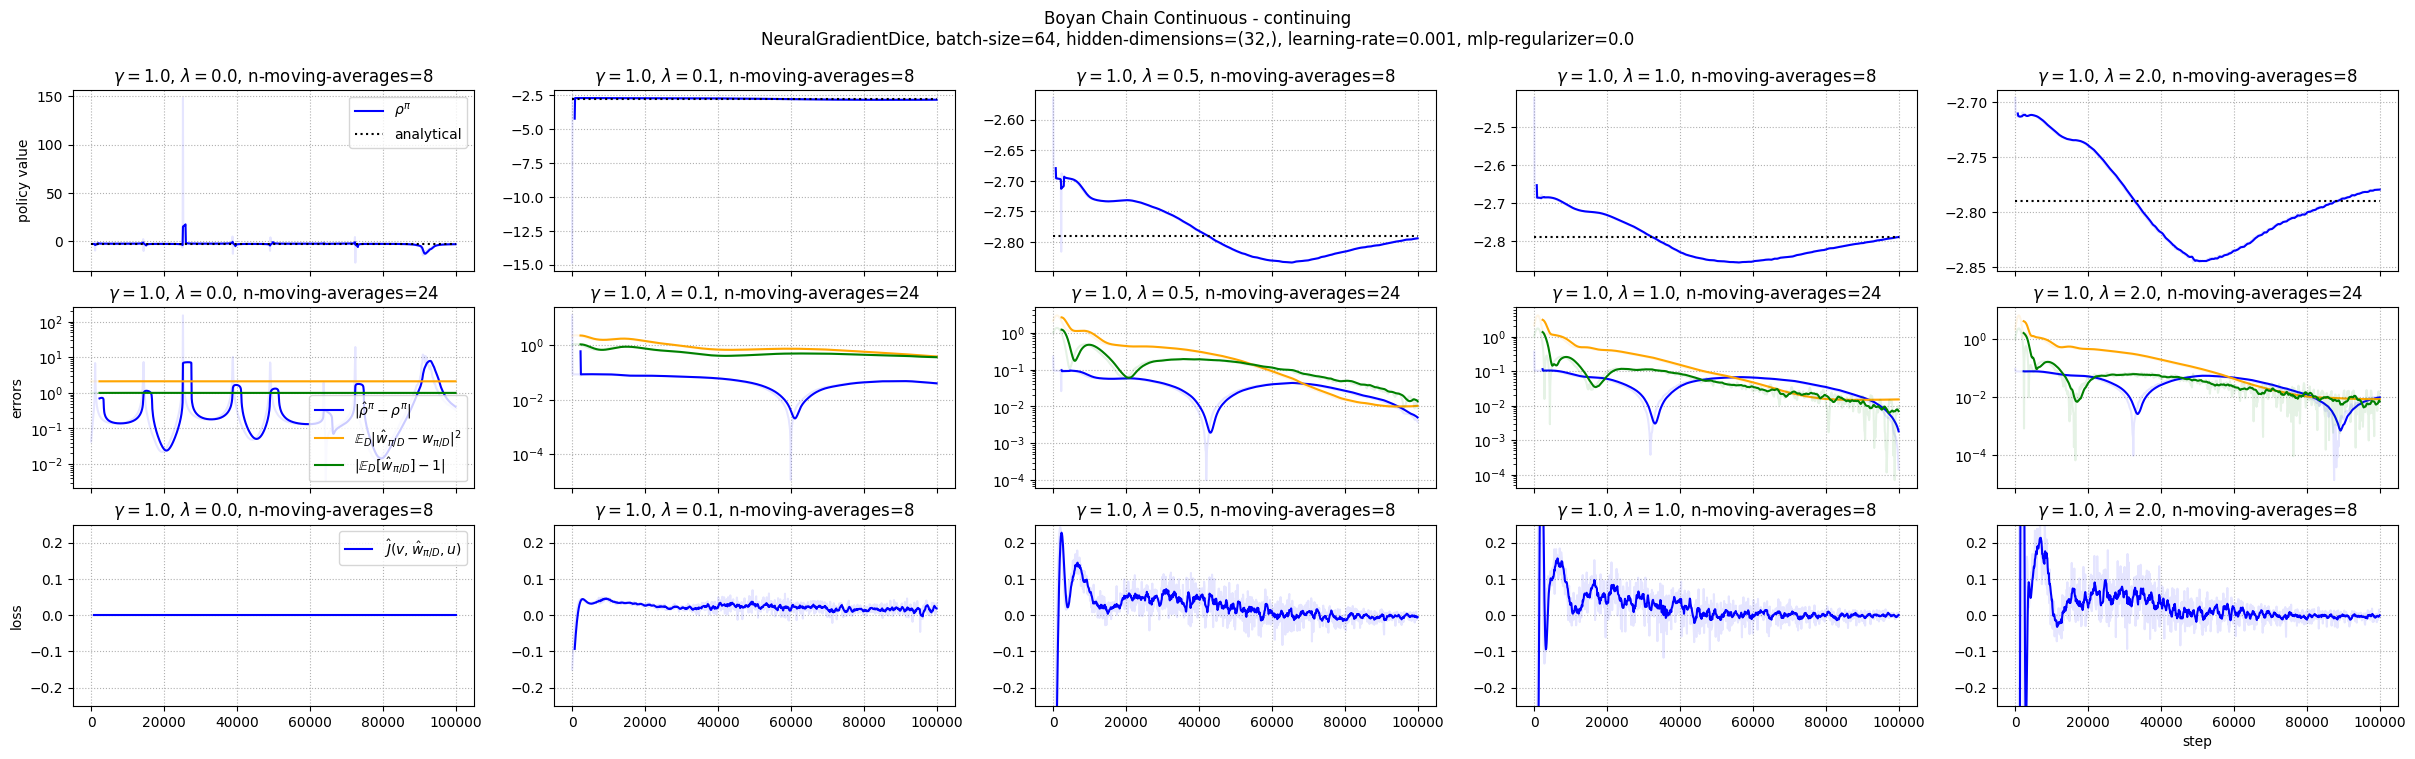

In [110]:
for lr in [0.01, 0.005, 0.001]:
    get_plot_logs(
        analytical_solver["c"],
        #
        outputs_dir,
        hparam_str_policy, hparam_str_dataset[0]["c"],
        "NeuralGradientDice", hparam_str_evaluation=[
            f"gam1.0_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg{nreg}"
                for nreg in [0.0, 0.1, 0.5, 1.0, 2.0]
        ],
        ylim_3=(-0.25, 0.25),
        n_ma_1=8, n_ma_2=24, n_ma_3=8,
        #
        save_dir=save_dir_images,
    )